In [1]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [2]:
from pprint import pprint

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
bat_df = pd.read_csv("../Data/Corpus_csv/batters_all_career.csv")

In [4]:
bat_df.head()

Id             Name  Active  First year  Last year  \
0    Aaron_Altherr_320    Aaron Altherr   False        2014       2019   
1       Abe_Atkins_626       Abe Atkins   False        1923       1923   
2  Abiatal_Avelino_670  Abiatal Avelino   False        2018       2019   
3  Abraham_Almonte_292  Abraham Almonte    True        2013       2021   
4             Adams_69            Adams   False        1942       1942   

                                                 Url      Country  \
0  https://www.baseball-reference.com//players/a/...           de   
1  https://www.baseball-reference.com//players/a/...           us   
2  https://www.baseball-reference.com//players/a/...           do   
3  https://www.baseball-reference.com//players/a/...           do   
4  https://www.baseball-reference.com//players/a/...  desconocido   

      Bat hand   Throw hand             Full Name  HoF HoF type HoF year  \
0        Right        Right  Aaron Samuel Altherr    0        -        -   
1  desconocido  desconocido            Abe Atkins    0        -        -   
2        Right        Right       Abiatal Avelino    0        -        -   
3         Both        Right       Abraham Almonte    0        -        -   
4  desconocido  desconocido           desconocido    0        -        -   

  HoF comittee  Player type retirement_age  total_seasons  \
0            -            2             28              6   
1            -            2             29              1   
2            -            2             24              2   
3            -            2             32              9   
4            -            2    desconocido              1   

                                 career_teams career_leagues first_position  \
0                                     ['PHI']         ['NL']             OF   
1                                      ['TT']        ['NNL']             3B   
2                                     ['SFG']         ['NL']             SS   
3  ['SEA', 'CLE', 'KCR', 'ARI', 'SDP', 'ATL']   ['AL', 'NL']             OF   
4                                     ['MRS']        ['NAL']              C   

  second_position  play_in_mayors  play_in_negro_league  two_way_player  \
0               -               1                     0               0   
1               -               0                     1               0   
2              2B               1                     0               0   
3               -               1                     0               0   
4               -               0                     1               0   

   debut_decade  retirament_decade  2B_bt  3B_bt   AB_bt  BA_bt  BB_bt  CS_bt  \
0          2010               2010   54.0   10.0  1016.0  0.219  110.0   10.0   
1          1920               1920    0.0    0.0     1.0  0.000    0.0    NaN   
2          2010               2010    0.0    0.0    18.0  0.278    1.0    0.0   
3          2010               2020   70.0   13.0  1186.0  0.234  117.0    9.0   
4          1940               1940    0.0    0.0     0.0    NaN    0.0    NaN   

    G_bt  HR_bt   H_bt  IBB_bt  OBP_bt  OPS+_bt  OPS_bt   PA_bt  RAA_bt  \
0  359.0   37.0  222.0     4.0   0.307     88.0   0.708  1156.0   -17.0   
1    1.0    0.0    0.0     NaN   0.000   -100.0   0.000     2.0    -1.0   
2   10.0    0.0    5.0     0.0   0.316     65.0   0.594    19.0    -1.0   
3  440.0   23.0  278.0     1.0   0.302     82.0   0.676  1326.0   -32.0   
4    1.0    0.0    0.0     NaN     NaN      NaN     NaN     0.0     0.0   

   RAR_bt  RBI_bt   R_bt  Rbaser_bt  Rbat_bt  Rdp_bt  Rfield_bt  Rpos_bt  \
0    21.0   150.0  142.0        1.0    -14.0    -1.0        7.0    -10.0   
1    -1.0     0.0    0.0        0.0     -1.0     0.0        0.0      0.0   
2    -1.0     1.0    1.0       -1.0     -1.0     0.0        0.0      0.0   
3    14.0   116.0  161.0        1.0    -32.0     2.0        2.0     -6.0   
4     0.0     0.0    0.0        0.0      0.0     0.0        0.0      0.0   

   Rrep_bt  SB_

In [5]:
bat_df.shape

(12525, 78)

In [6]:
from Preprocessing.data_keys import headers_bio, headers_bat

In [7]:
from Preprocessing.data_frame_procces import filter_dataset, select_features

In [8]:
bat_df['retirement_age'] = (
        bat_df['retirement_age'].replace('desconocido', bat_df['retirement_age'].mode()[0])
    )
bat_df['retirement_age'] = bat_df['retirement_age'].astype('int64')

In [9]:
gt_conditions = {
    "total_seasons":3,
    'G_bt':100,
    'BA_bt':0.2,
}
eq_conditions = {
    "HoF type":['-','Player']
}
filter_df = filter_dataset(bat_df, eq_conditions,gt_conditions, None, None)

In [10]:
filter_df.shape

(5761, 78)

In [11]:
for h in headers_bat:
    nan = filter_df[h].isna().any()
    if nan:
        print(f"{h}:{nan} --->{filter_df[h].isna().sum()}")
        #print(f"{h}:{bat_df[h].isna().sum()}")

CS_bt:True --->891
IBB_bt:True --->1306
SB_bt:True --->29
SF_bt:True --->2099
SH_bt:True --->292
SO_bt:True --->347
CS%_fd:True --->4748
CS_fd:True --->4073
PB_fd:True --->4474
SB_fd:True --->4073
WP_fd:True --->4474


In [12]:
print(filter_df['HoF'].value_counts())

0    5576
1     185
Name: HoF, dtype: int64


In [13]:
inactives_cond = {"Active":[False]}
inactive_bat_df = filter_dataset(filter_df, inactives_cond, None, None, None) 

In [14]:
inactive_bat_df.shape

(5330, 78)

In [15]:
print(inactive_bat_df['HoF'].value_counts())

0    5145
1     185
Name: HoF, dtype: int64


In [16]:
negro_league_condition = {
    'play_in_negro_league':[1]
}
negro_lg_bat_df = filter_dataset(filter_df, negro_league_condition, None, None, None)

In [17]:
negro_lg_bat_df.shape

(378, 78)

In [18]:
negro_lg_bat_df.describe()

First year    Last year         HoF  Player type  retirement_age  \
count   378.000000   378.000000  378.000000        378.0      378.000000   
mean   1929.007937  1939.296296    0.063492          2.0       34.150794   
std       8.260188     9.750578    0.244169          0.0        5.605133   
min    1920.000000  1922.000000    0.000000          2.0       20.000000   
25%    1922.000000  1930.250000    0.000000          2.0       30.000000   
50%    1926.000000  1940.000000    0.000000          2.0       34.000000   
75%    1936.000000  1947.000000    0.000000          2.0       37.000000   
max    1948.000000  1980.000000    1.000000          2.0       58.000000   

       total_seasons  play_in_mayors  play_in_negro_league  two_way_player  \
count     378.000000      378.000000                 378.0           378.0   
mean        8.775132        0.203704                   1.0             0.0   
std         4.243230        0.403285                   0.0             0.0   
min         3.000000        0.000000                   1.0             0.0   
25%         5.000000        0.000000                   1.0             0.0   
50%         8.000000        0.000000                   1.0             0.0   
75%        11.000000        0.000000                   1.0             0.0   
max        23.000000        1.000000                   1.0             0.0   

       debut_decade  retirament_decade       2B_bt       3B_bt         AB_bt  \
count    378.000000         378.000000  378.000000  378.000000    378.000000   
mean    1925.634921        1933.968254   54.738095   18.142857   1244.298942   
std        7.373625           9.832499   58.056340   17.852199   1129.903124   
min     1920.000000        1920.000000    5.000000    0.000000    296.000000   
25%     1920.000000        1930.000000   21.000000    7.000000    550.250000   
50%     1920.000000        1940.000000   33.500000   12.000000    879.000000   
75%     1930.000000        1940.000000   68.500000   22.750000   1620.000000   
max     1940.000000        1980.000000  525.000000  141.000000  10924.000000   

            BA_bt        BB_bt       CS_bt        G_bt       HR_bt  \
count  378.000000   378.000000   67.000000   378.00000  378.000000   
mean     0.277611   122.494709   10.716418   354.42328   20.904762   
std      0.034308   148.189950   25.866678   312.28026   48.338236   
min      0.200000     8.000000    0.000000   100.00000    0.000000   
25%      0.255250    46.250000    0.000000   164.00000    3.000000   
50%      0.275000    74.000000    0.000000   251.00000    7.500000   
75%      0.300000   144.500000    6.000000   449.50000   18.000000   
max      0.408000  1468.000000  130.000000  3005.00000  660.000000   

              H_bt      IBB_bt      OBP_bt     OPS+_bt      OPS_bt  \
count   378.000000  161.000000  378.000000  378.000000  378.000000   
mean    356.185185    5.204969    0.340960   98.285714    0.724937   
std     342.392956   21.765546    0.038709   29.351756    0.111725   
min      66.000000    0.000000    0.251000   34.000000    0.491000   
25%     147.250000    0.000000    0.315000   77.250000    0.647000   
50%     240.500000    0.000000    0.340000   96.000000    0.712500   
75%     455.000000    1.000000    0.363750  115.750000    0.798750   
max    3293.000000  214.000000    0.492000  214.000000    1.178000   

              PA_bt       RAA_bt       RAR_bt       RBI_bt         R_bt  \
count    378.000000   378.000000   378.000000   378.000000   378.000000   
mean    1409.235450    16.097884    63.026455   184.267196   207.277778   
std     1302.874378    91.620127   126.608293   201.169591   215.635400   
min      316.000000  -125.000000   -60.000000    19.000000    28.000000   
25%      609.750000   -21.000000     5.000000    71.000000    80.000000   
50%      991.000000    -3.000000    24.500000   110.500000   131.000000   
75%     1827.500000    23.000000    72.750000   228.250000   255.000000   
max    12545.000000  1039.000000  149

In [19]:
negro_lg_bat_df['HoF'].value_counts()

0    354
1     24
Name: HoF, dtype: int64

In [20]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
mL_gt_cond = {
    'WAR_bt':10
}
mayors_lg_bat_df = filter_dataset(filter_df, mayor_league_condition, mL_gt_cond, None, None)

In [21]:
mayors_lg_bat_df.shape

(1670, 78)

In [22]:
drop_recent_election_cond = {
    'retirament_decade':2009
}
inactive_mayors_lg_bat_df = filter_dataset(inactive_bat_df, mayor_league_condition, mL_gt_cond, drop_recent_election_cond, None)

In [23]:
inactive_mayors_lg_bat_df.shape

(1290, 78)

In [24]:
inactive_mayors_lg_bat_df.describe()

First year    Last year          HoF  Player type  retirement_age  \
count  1290.000000  1290.000000  1290.000000       1290.0     1290.000000   
mean   1945.393798  1958.806977     0.125581          2.0       35.452713   
std      35.283710    35.458549     0.331506          0.0        3.501924   
min    1871.000000  1877.000000     0.000000          2.0       26.000000   
25%    1915.000000  1929.000000     0.000000          2.0       33.000000   
50%    1951.000000  1966.000000     0.000000          2.0       35.000000   
75%    1976.000000  1989.750000     0.000000          2.0       37.000000   
max    2001.000000  2009.000000     1.000000          2.0       56.000000   

       total_seasons  play_in_mayors  play_in_negro_league  two_way_player  \
count    1290.000000          1290.0           1290.000000      1290.00000   
mean       13.723256             1.0              0.015504         0.00155   
std         3.724013             0.0              0.123593         0.03936   
min         4.000000             1.0              0.000000         0.00000   
25%        11.000000             1.0              0.000000         0.00000   
50%        13.000000             1.0              0.000000         0.00000   
75%        16.000000             1.0              0.000000         0.00000   
max        27.000000             1.0              1.000000         1.00000   

       debut_decade  retirament_decade        2B_bt        3B_bt  \
count   1290.000000        1290.000000  1290.000000  1290.000000   
mean    1941.031008        1954.093023   248.341085    56.176744   
std       35.391293          35.442332   115.239414    40.204343   
min     1870.000000        1870.000000    36.000000     2.000000   
25%     1910.000000        1920.000000   164.000000    28.000000   
50%     1950.000000        1960.000000   226.000000    47.000000   
75%     1970.000000        1987.500000   307.750000    73.000000   
max     2000.000000        2000.000000   792.000000   309.000000   

              AB_bt        BA_bt        BB_bt        CS_bt         G_bt  \
count   1290.000000  1290.000000  1290.000000  1133.000000  1290.000000   
mean    5209.704651     0.277590   545.475194    49.409532  1483.337984   
std     1980.567779     0.023239   300.894693    38.169049   514.340554   
min     1292.000000     0.217000    10.000000     0.000000   307.000000   
25%     3774.000000     0.262000   342.250000    22.000000  1112.000000   
50%     4913.000000     0.275000   471.000000    39.000000  1415.500000   
75%     6442.500000     0.291000   677.500000    66.000000  1800.750000   
max    14053.000000     0.366000  2558.000000   335.000000  3562.000000   

             HR_bt         H_bt      IBB_bt       OBP_bt      OPS+_bt  \
count  1290.000000  1290.000000  982.000000  1290.000000  1290.000000   
mean    120.444186  1458.346512   50.461303     0.348319   110.044186   
std     114.498307   609.588965   48.180302     0.028991    18.596330   
min       0.000000   423.000000    0.000000     0.265000    65.000000   
25%      40.000000  1004.750000   21.000000     0.329000    98.000000   
50%      85.000000  1339.500000   38.000000     0.347000   109.000000   
75%     163.000000  1803.750000   65.000000     0.366000   121.000000   
max     762.000000  4256.000000  688.000000     0.482000   206.000000   

            OPS_bt         PA_bt       RAA_bt      RAR_bt       RBI_bt  \
count  1290.000000   1290.000000  1290.000000  1290.00000  1290.000000   
mean      0.761171   5888.166667    98.755039   295.71938   694.564341   
std       0.076257   2251.045122   154.673295   206.77849   354.156879   
min       0.542000   1430.000000  -179.000000    93.00000    92.000000   
25%       0.711000   4238.500000     7.000000   152.00000   428.250000   
50%       0.757000   5528.500000    54.000000   224.50000   598.500000   
75%       0.806000   7236.750000   145.750000   369.00000   876.750000   
max       1.164000  15890.000000  1326.000000  1703.00000  2297.000000  

In [25]:
elegible_per_ten_year_cond = {
    "total_seasons":10,
}

inactive_plus_10_season = filter_dataset(inactive_mayors_lg_bat_df, None,elegible_per_ten_year_cond, None, None)


In [26]:
inactive_plus_10_season.shape

(1136, 78)

In [27]:
features = ['retirement_age','debut_decade','retirament_decade','total_seasons','play_in_mayors','play_in_negro_league','two_way_player','2B_bt',
'3B_bt','AB_bt','BA_bt','BB_bt','G_bt','HR_bt','H_bt','OBP_bt','OPS+_bt','OPS_bt','PA_bt','RAA_bt','RAR_bt','RBI_bt',
'R_bt','Rbaser_bt','Rbat_bt','Rdp_bt','Rfield_bt','Rpos_bt','Rrep_bt','SLG_bt','TB_bt','WAA_bt','WAR_bt','dWAR_bt',
'oRAR_bt','oWAR_bt','A_fd','CG_fd','Ch_fd','DP_fd','E_fd','Fld%_fd','GS_fd','G_fd','Inn_fd','PO_fd','RF/9_fd',
'RF/G_fd']

incomplete_feature = ['CS_bt','IBB_bt','SB_bt','SF_bt','SH_bt','SO_bt','CS%_fd','CS_fd','PB_fd','SB_fd','WP_fd']

target = ['HoF']

print(len(features+target))

49


In [28]:
X = select_features(inactive_plus_10_season, features+['SB_bt']+target)
X

retirement_age  debut_decade  retirament_decade  total_seasons  \
5                  37          1970               1980             17   
19                 42          1950               1970             23   
34                 36          1980               2000             13   
36                 39          1950               1970             18   
48                 37          1940               1950             14   
...               ...           ...                ...            ...   
12467              34          1870               1880             15   
12507              32          1900               1910             13   
12512              34          1970               1980             13   
12517              38          1980               2000             16   
12522              42          1880               1900             19   

       play_in_mayors  play_in_negro_league  two_way_player  2B_bt  3B_bt  \
5                   1                     0               0  183.0   13.0   
19                  1                     0               0  624.0   98.0   
34                  1                     0               0  189.0   53.0   
36                  1                     0               0  394.0   92.0   
48                  1                     0               0  188.0   49.0   
...               ...                   ...             ...    ...    ...   
12467               1                     0               0  218.0   89.0   
12507               1                     0               0  275.0  105.0   
12512               1                     0               0  245.0   26.0   
12517               1                     0               0  397.0   23.0   
12522               1                     0               0  222.0   76.0   

         AB_bt  BA_bt   BB_bt    G_bt  HR_bt    H_bt  OBP_bt  OPS+_bt  OPS_bt  \
5       4123.0  0.245   461.0  1370.0   90.0  1010.0   0.320     93.0   0.681   
19     12364.0  0.305  1402.0  3298.0  755.0  3771.0   0.374    155.0   0.928   
34      3971.0  0.260   500.0  1341.0   47.0  1031.0   0.346     89.0   0.715   
36     10230.0  0.262   736.0  2599.0   83.0  2677.0   0.311     82.0   0.653   
48      4019.0  0.269   414.0  1281.0   37.0  1082.0   0.340     90.0   0.708   
...        ...    ...     ...     ...    ...     ...     ...      ...     ...   
12467   4005.0  0.273   198.0   963.0   14.0  1095.0   0.309    119.0   0.692   
12507   5304.0  0.295   242.0  1456.0   58.0  1566.0   0.331    121.0   0.750   
12512   5144.0  0.287   533.0  1453.0  207.0  1477.0   0.353    127.0   0.818   
12517   7573.0  0.265   945.0  2158.0  253.0  2004.0   0.346    104.0   0.769   
12522   4546.0  0.269   390.0  1280.0   26.0  1225.0   0.339     96.0   0.708   

         PA_bt  RAA_bt  RAR_bt  RBI_bt    R_bt  Rbaser_bt  Rbat_bt  Rdp_bt  \
5       4699.0   -45.0   117.0   513.0   397.0      -13.0    -48.0    -6.0   
19     13941.0   866.0  1363.0  2297.0  2174.0       44.0    877.0   -12.0   
34      4614.0   -32.0   129.0   422.0   551.0        7.0    -65.0     2.0   
36     11231.0   215.0   565.0   791.0  1335.0       92.0   -198.0    18.0   
48      4534.0    -5.0   164.0   303.0   591.0       10.0    -40.0     8.0   
...        ...     ...     ...     ...     ...        ...      ...     ...   
12467   4213.0    70.0   207.0   502.0   743.0        1.0     81.0     0.0   
12507   5744.0   146.0   323.0   799.0   695.0       -8.0    124.0     0.0   
12512   5737.0    56.0   252.0   792.0   681.0      -14.0    172.0   -13.0   
12517   8649.0   -61.0   217.0  1110.0   986.0      -30.0     49.0   -17.0   
12522   5078.0   152.0   321.0   625.0   617.0      -10.0    -42.0     0.0   

       Rfield_bt  Rpos_bt  Rrep_bt  SLG_bt   TB_bt  WAA_bt  WAR_bt  dWAR_bt  \
5          -57.0     78.0    162.0   0.361  1489.0    -5.0    11.1      2.4   
19          98.0   -141.0    496.0   0.555  6856.0    92.8   143.0     -4.6   
34           1.0     21.0    161.0   0.369  1467.0    -3.5

In [29]:
X.describe()

retirement_age  debut_decade  retirament_decade  total_seasons  \
count     1136.000000   1136.000000        1136.000000    1136.000000   
mean        36.020246   1942.746479        1956.540493      14.501761   
std          3.205520     34.990634          34.695709       3.240166   
min         28.000000   1870.000000        1880.000000      10.000000   
25%         34.000000   1917.500000        1930.000000      12.000000   
50%         36.000000   1950.000000        1960.000000      14.000000   
75%         38.000000   1970.000000        1990.000000      17.000000   
max         56.000000   2000.000000        2000.000000      27.000000   

       play_in_mayors  play_in_negro_league  two_way_player        2B_bt  \
count          1136.0           1136.000000     1136.000000  1136.000000   
mean              1.0              0.016725        0.001761   263.509683   
std               0.0              0.128297        0.041941   113.630749   
min               1.0              0.000000        0.000000    56.000000   
25%               1.0              0.000000        0.000000   182.000000   
50%               1.0              0.000000        0.000000   242.000000   
75%               1.0              0.000000        0.000000   322.000000   
max               1.0              1.000000        1.000000   792.000000   

             3B_bt         AB_bt        BA_bt        BB_bt         G_bt  \
count  1136.000000   1136.000000  1136.000000  1136.000000  1136.000000   
mean     58.386444   5511.107394     0.277511   576.508803  1569.310739   
std      41.458130   1904.711469     0.023056   304.122923   483.346983   
min       2.000000   1292.000000     0.217000    25.000000   354.000000   
25%      29.000000   4157.750000     0.262000   369.000000  1222.750000   
50%      49.000000   5206.500000     0.275000   502.500000  1482.500000   
75%      76.000000   6686.500000     0.291000   715.500000  1860.500000   
max     309.000000  14053.000000     0.366000  2558.000000  3562.000000   

             HR_bt         H_bt       OBP_bt      OPS+_bt       OPS_bt  \
count  1136.000000  1136.000000  1136.000000  1136.000000  1136.000000   
mean    129.616197  1543.727113     0.347805   109.629401     0.761733   
std     118.165451   596.350235     0.029108    18.818610     0.077544   
min       0.000000   423.000000     0.269000    65.000000     0.542000   
25%      44.000000  1120.000000     0.328750    97.000000     0.710000   
50%      94.000000  1446.500000     0.346000   109.000000     0.757000   
75%     179.000000  1886.250000     0.365000   121.000000     0.806250   
max     762.000000  4256.000000     0.482000   206.000000     1.164000   

              PA_bt       RAA_bt       RAR_bt       RBI_bt         R_bt  \
count   1136.000000  1136.000000  1136.000000  1136.000000  1136.000000   
mean    6226.464789   105.554577   314.200704   736.647887   809.712148   
std     2170.833830   162.565545   212.880902   354.552866   354.563126   
min     1430.000000  -179.000000    94.000000   187.000000   169.000000   
25%     4665.500000     5.000000   164.000000   470.750000   553.750000   
50%     5864.500000    59.500000   252.000000   651.000000   736.000000   
75%     7558.250000   160.000000   399.000000   943.750000   992.250000   
max    15890.000000  1326.000000  1703.000000  2297.000000  2295.000000   

         Rbaser_bt      Rbat_bt       Rdp_bt    Rfield_bt      Rpos_bt  \
count  1136.000000  1136.000000  1136.000000  1136.000000  1136.000000   
mean      3.045775    92.926937    -0.194542    15.995599    -6.235035   
std      17.546053   173.460094     9.735353    51.296709    62.877871   
min     -33.000000  -317.000000   -47.000000  -195.000000  -190.000000   
25%      -7.000000   -12.000000    -5.000000   -14.000000   -55.250000   
50%      -1.000000    61.000000     0.000000    13.000000    -9.500000   
75%       8.000000   164.000000     4.000000    40.000000    43.000000   
max     144.000000  1333.000000    36.000000   294.00

In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [31]:
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

In [32]:
from Models.functions.stats_bar import stats_bar_plot

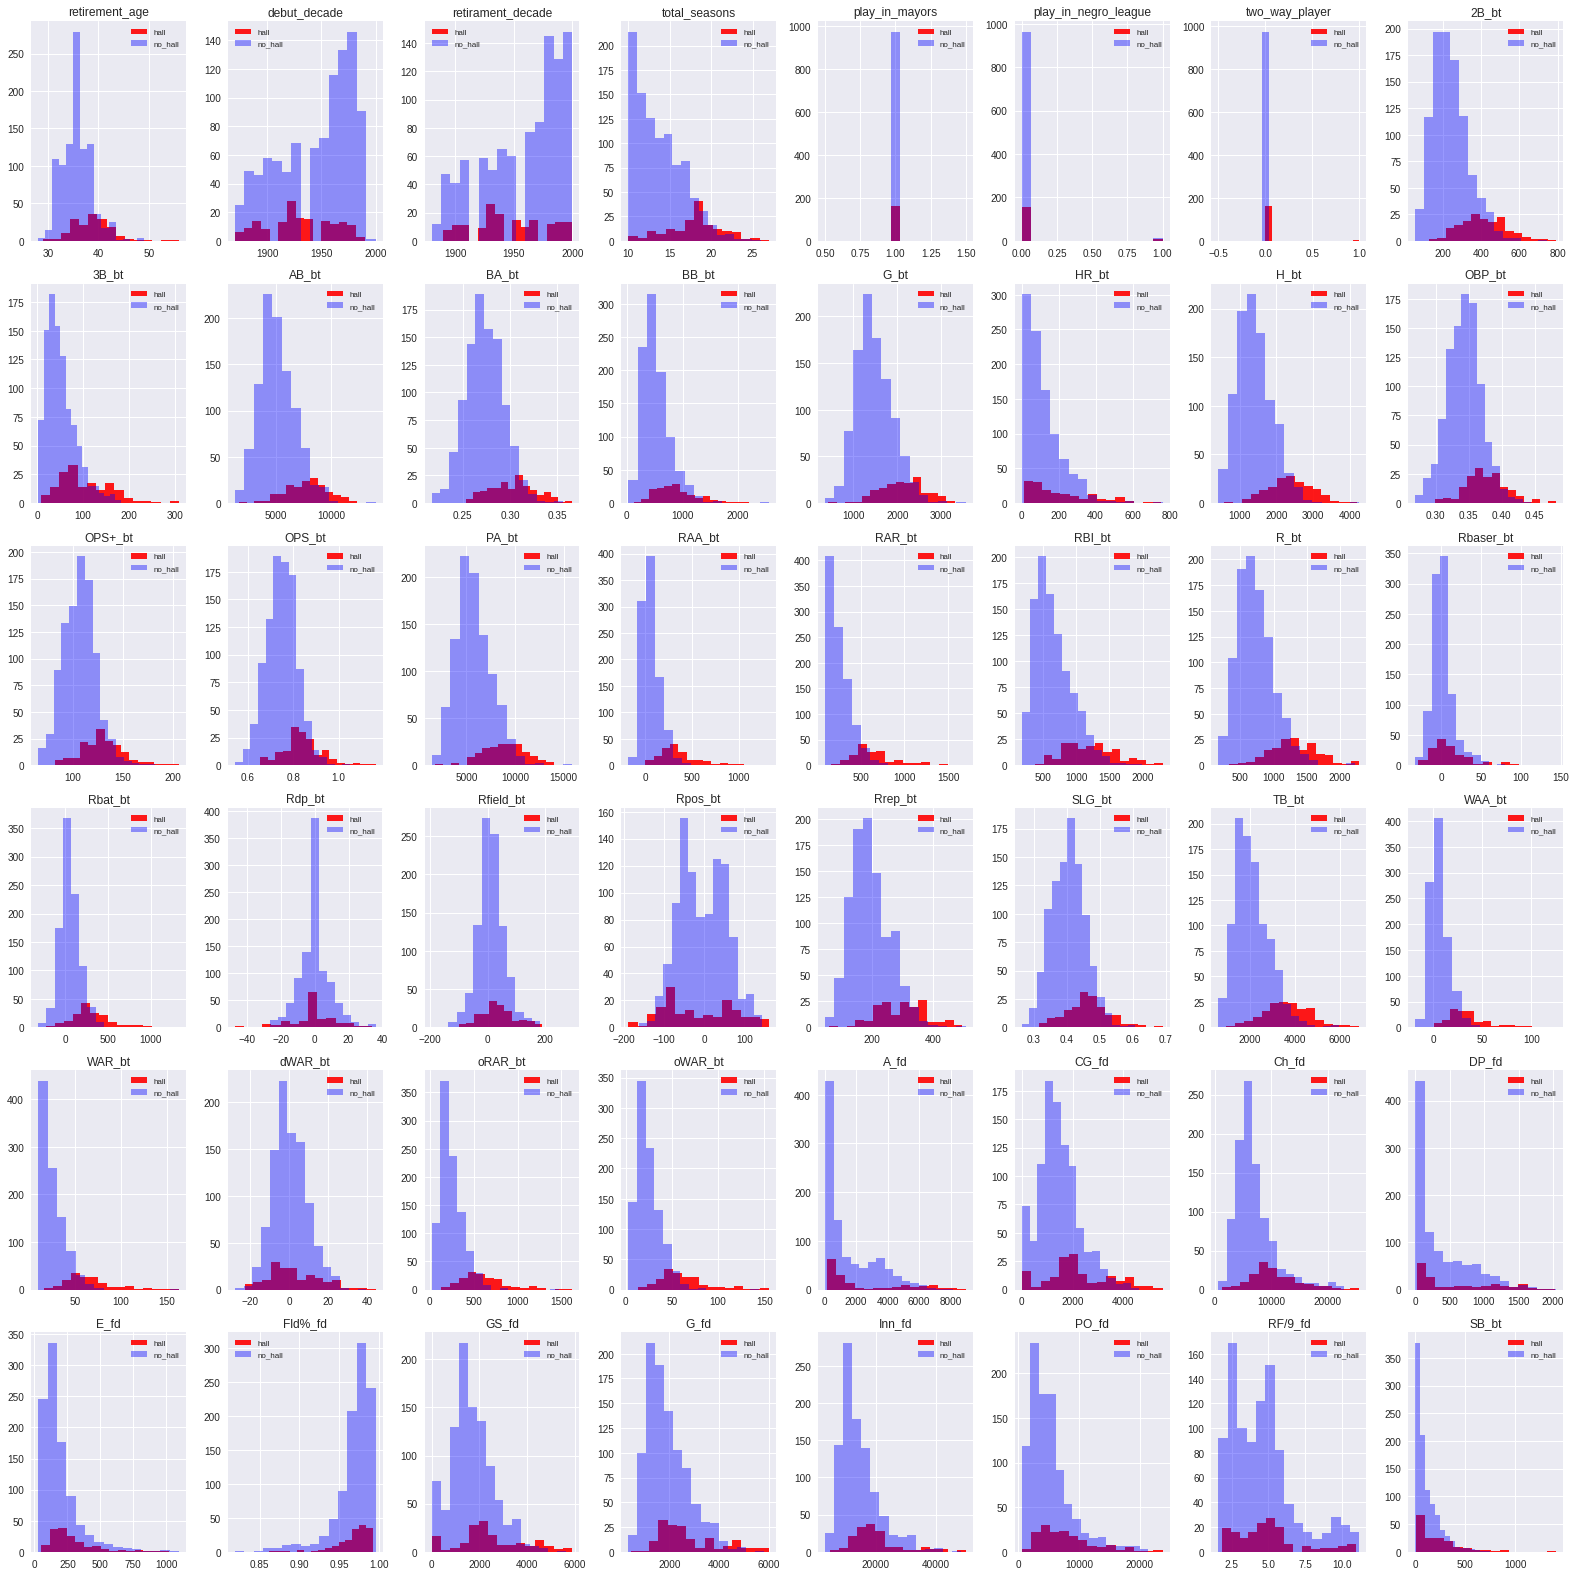

In [33]:
stats_bar_plot(hall, no_hall, features[:-1]+['SB_bt'], 6,8,(22,22))

Las estadisticas defensivas no muestran practicamente diferencia en ambos grupos

In [31]:
of_features = ['retirement_age','debut_decade','retirament_decade','total_seasons','two_way_player','2B_bt',
'3B_bt','AB_bt','BA_bt','BB_bt','G_bt','HR_bt','H_bt','OBP_bt','OPS+_bt','OPS_bt','PA_bt','RAA_bt','RAR_bt','RBI_bt',
'R_bt','Rbaser_bt','Rbat_bt','Rdp_bt','Rfield_bt','Rpos_bt','Rrep_bt','SLG_bt','TB_bt','WAA_bt','WAR_bt','dWAR_bt',
'oRAR_bt','oWAR_bt','SB_bt']

In [32]:
X = select_features(inactive_plus_10_season, of_features)
y = select_features(inactive_plus_10_season, ['HoF'])

In [33]:
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

In [34]:
print(X.index)
y.index

RangeIndex(start=0, stop=1136, step=1)


RangeIndex(start=0, stop=1136, step=1)

In [38]:
X.describe()

retirement_age  debut_decade  retirament_decade  total_seasons  \
count     1136.000000   1136.000000        1136.000000    1136.000000   
mean        36.020246   1942.746479        1956.540493      14.501761   
std          3.205520     34.990634          34.695709       3.240166   
min         28.000000   1870.000000        1880.000000      10.000000   
25%         34.000000   1917.500000        1930.000000      12.000000   
50%         36.000000   1950.000000        1960.000000      14.000000   
75%         38.000000   1970.000000        1990.000000      17.000000   
max         56.000000   2000.000000        2000.000000      27.000000   

       two_way_player        2B_bt        3B_bt         AB_bt        BA_bt  \
count     1136.000000  1136.000000  1136.000000   1136.000000  1136.000000   
mean         0.001761   263.509683    58.386444   5511.107394     0.277511   
std          0.041941   113.630749    41.458130   1904.711469     0.023056   
min          0.000000    56.000000     2.000000   1292.000000     0.217000   
25%          0.000000   182.000000    29.000000   4157.750000     0.262000   
50%          0.000000   242.000000    49.000000   5206.500000     0.275000   
75%          0.000000   322.000000    76.000000   6686.500000     0.291000   
max          1.000000   792.000000   309.000000  14053.000000     0.366000   

             BB_bt         G_bt        HR_bt         H_bt       OBP_bt  \
count  1136.000000  1136.000000  1136.000000  1136.000000  1136.000000   
mean    576.508803  1569.310739   129.616197  1543.727113     0.347805   
std     304.122923   483.346983   118.165451   596.350235     0.029108   
min      25.000000   354.000000     0.000000   423.000000     0.269000   
25%     369.000000  1222.750000    44.000000  1120.000000     0.328750   
50%     502.500000  1482.500000    94.000000  1446.500000     0.346000   
75%     715.500000  1860.500000   179.000000  1886.250000     0.365000   
max    2558.000000  3562.000000   762.000000  4256.000000     0.482000   

           OPS+_bt       OPS_bt         PA_bt       RAA_bt       RAR_bt  \
count  1136.000000  1136.000000   1136.000000  1136.000000  1136.000000   
mean    109.629401     0.761733   6226.464789   105.554577   314.200704   
std      18.818610     0.077544   2170.833830   162.565545   212.880902   
min      65.000000     0.542000   1430.000000  -179.000000    94.000000   
25%      97.000000     0.710000   4665.500000     5.000000   164.000000   
50%     109.000000     0.757000   5864.500000    59.500000   252.000000   
75%     121.000000     0.806250   7558.250000   160.000000   399.000000   
max     206.000000     1.164000  15890.000000  1326.000000  1703.000000   

            RBI_bt         R_bt    Rbaser_bt      Rbat_bt       Rdp_bt  \
count  1136.000000  1136.000000  1136.000000  1136.000000  1136.000000   
mean    736.647887   809.712148     3.045775    92.926937    -0.194542   
std     354.552866   354.563126    17.546053   173.460094     9.735353   
min     187.000000   169.000000   -33.000000  -317.000000   -47.000000   
25%     470.750000   553.750000    -7.000000   -12.000000    -5.000000   
50%     651.000000   736.000000    -1.000000    61.000000     0.000000   
75%     943.750000   992.250000     8.000000   164.000000     4.000000   
max    2297.000000  2295.000000   144.000000  1333.000000    36.000000   

         Rfield_bt      Rpos_bt      Rrep_bt       SLG_bt        TB_bt  \
count  1136.000000  1136.000000  1136.000000  1136.000000  1136.000000   
mean     15.995599    -6.235035   208.602113     0.413960  2312.858275   
std      51.296709    62.877871    74.810022     0.057127   968.443840   
min    -195.000000  -190.000000    46.000000     0.264000   611.000000   
25%     -14.000000   -55.250000   155.000000     0.373000  1612.750000   
50%      13.000000    -9.500000   195.500000     0.412000  2109.000000   
75%      40.000000    43.000000   257.000000     0.449000  2878.750000   
max     294.000000   162.000000   507.000000

In [39]:
print(X.shape)
y.shape

(1136, 35)


(1136, 1)

In [40]:
y.value_counts()

HoF
0      974
1      162
dtype: int64

Vemos el porcentaje de pertenencia a la clase minoritaria

In [41]:
round((162/1136),3)*100

14.299999999999999

El corpus es debalanceado y no es necesaria la separacion por grupos asi que utilizaremos StratifiedKFold para el entrenamiento

Vamos a marcar primero el baseline del problema, utilizando la prediccion negativa para cada jugador

In [42]:
from Models.functions.metrics import show_baseline_score
show_baseline_score(baseline=np.zeros_like(np.ravel(y)), y_val=np.ravel(y))

Accuracy: 0.8574
AUC: 0.5000


Vamos a tener una primera idea de como es el comportamiento inicial de los algoritmos frente al corpus sin procesamiento previo

In [45]:
from Models.functions.models_performance_comparer import performance_comparer

DecisionTree Gini depth=4


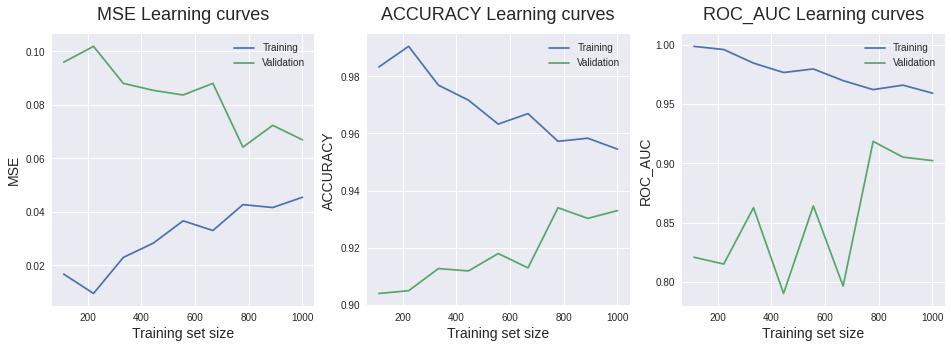

mACC:0.926
mAUC:0.873
<----------------------------------->

DecisionTree Entropy depth=4


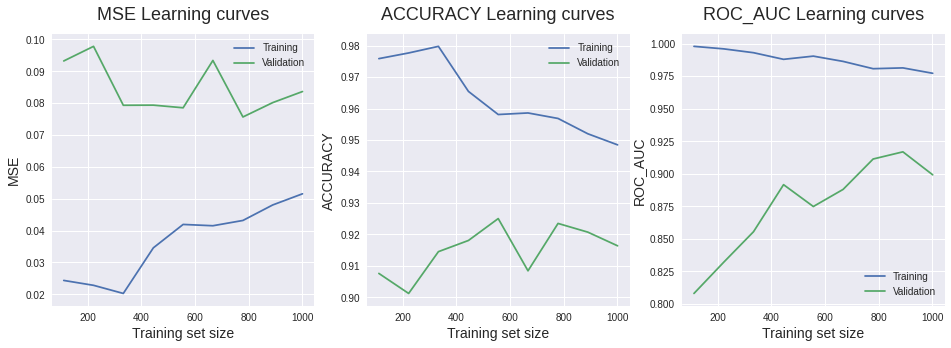

mACC:0.918
mAUC:0.905
<----------------------------------->

DecisionTree Gini depth=3


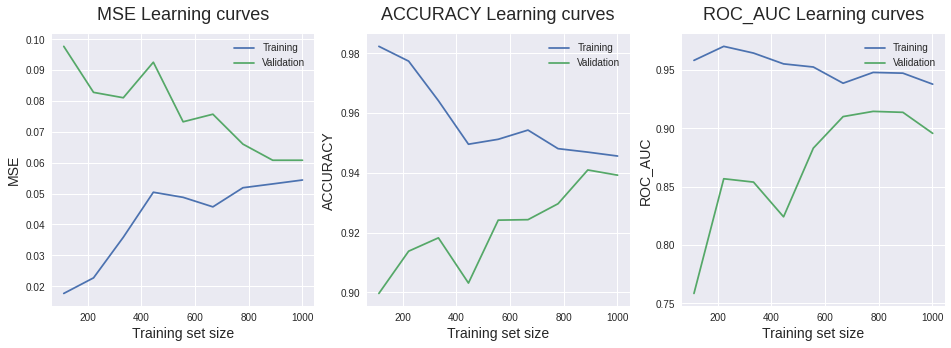

mACC:0.926
mAUC:0.873
<----------------------------------->

DecisionTree Entropy depth=3


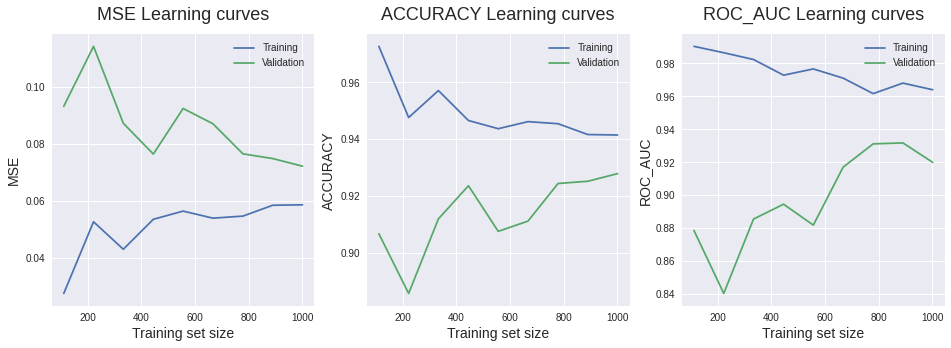

mACC:0.918
mAUC:0.905
<----------------------------------->

SVM kernel=poly


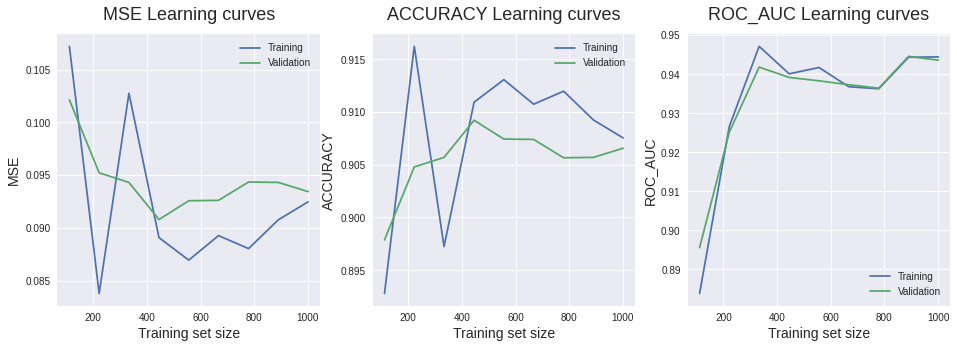

mACC:0.906
mAUC:0.939
<----------------------------------->

SVM kernel=rbf


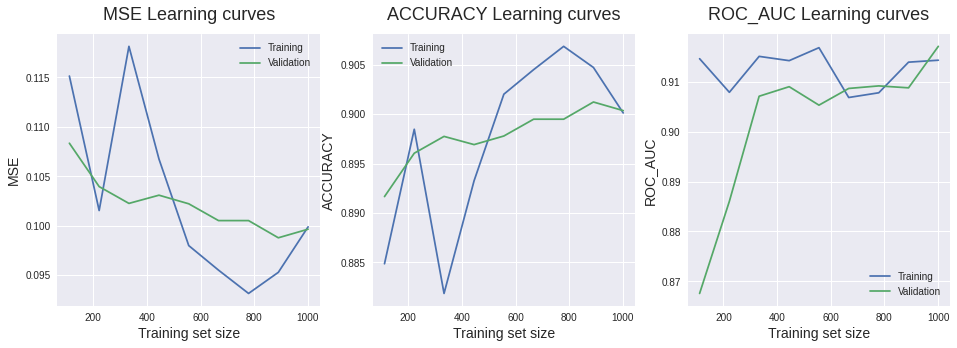

mACC:0.9
mAUC:0.909
<----------------------------------->

Random Forest estimators=10


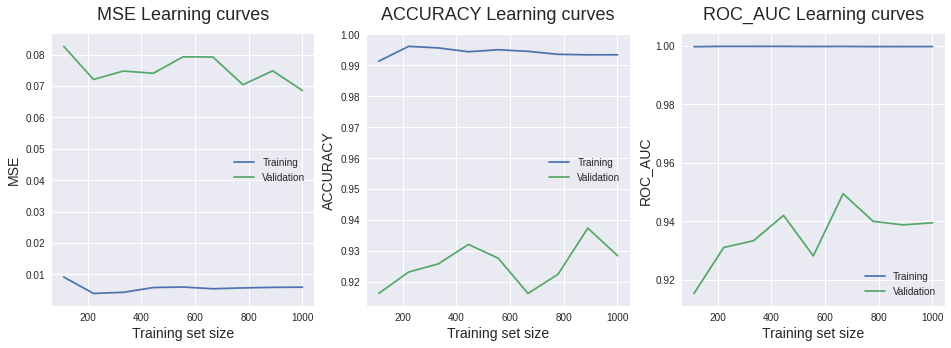

mACC:0.925
mAUC:0.943
<----------------------------------->

Random Forest estimators=5


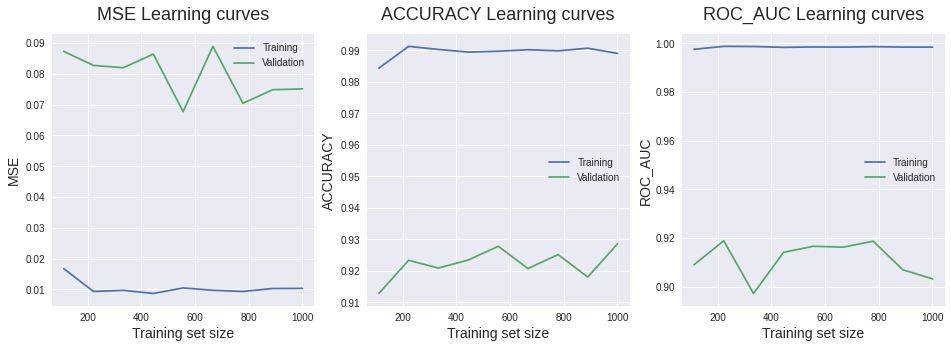

mACC:0.921
mAUC:0.914
<----------------------------------->

Naive Bayes


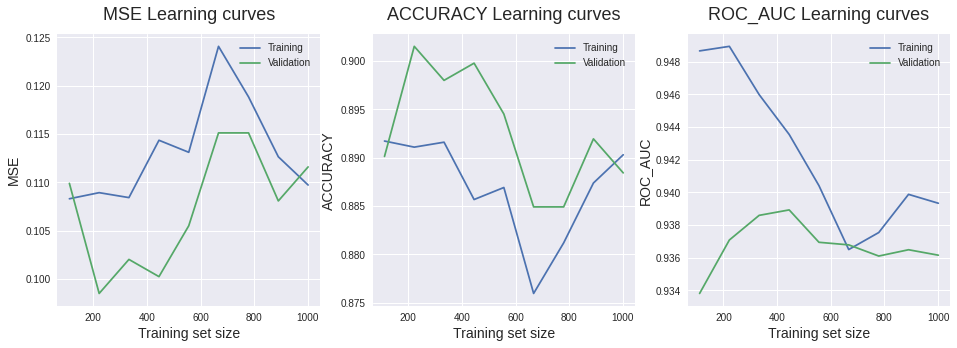

mACC:0.887
mAUC:0.936
<----------------------------------->

3NN


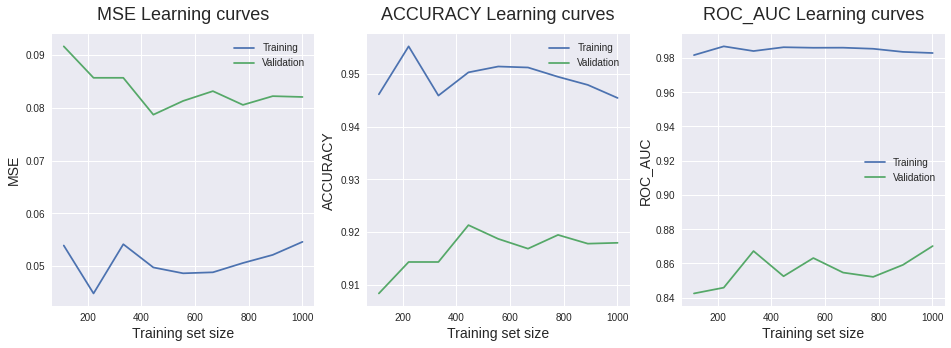

mACC:0.918
mAUC:0.855
<----------------------------------->

5NN


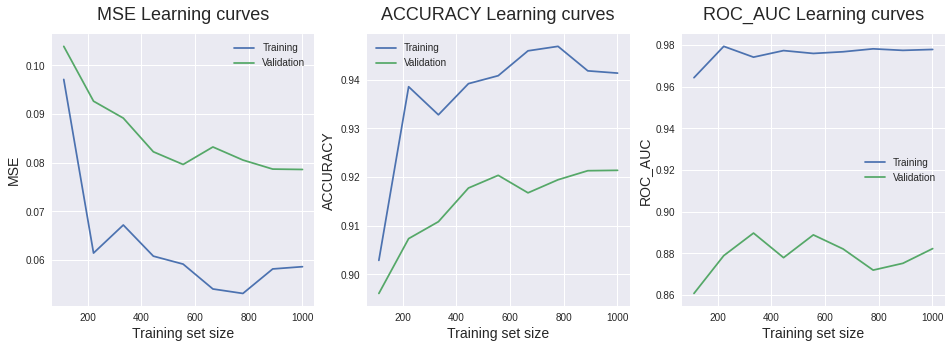

mACC:0.919
mAUC:0.876
<----------------------------------->

10NN


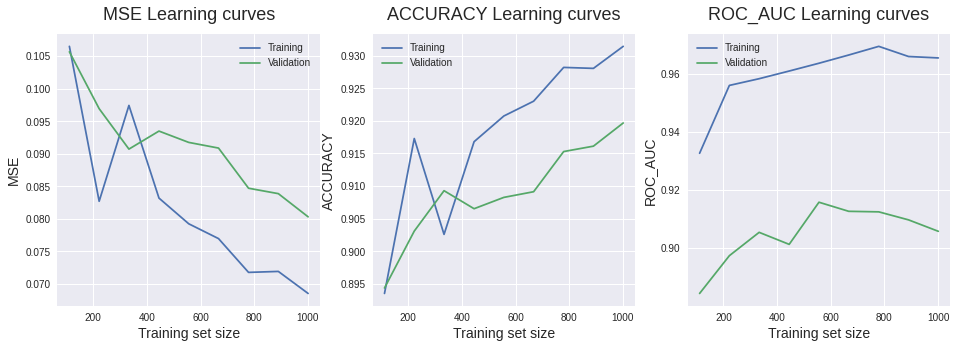

mACC:0.914
mAUC:0.912
<----------------------------------->

LogisticRegression


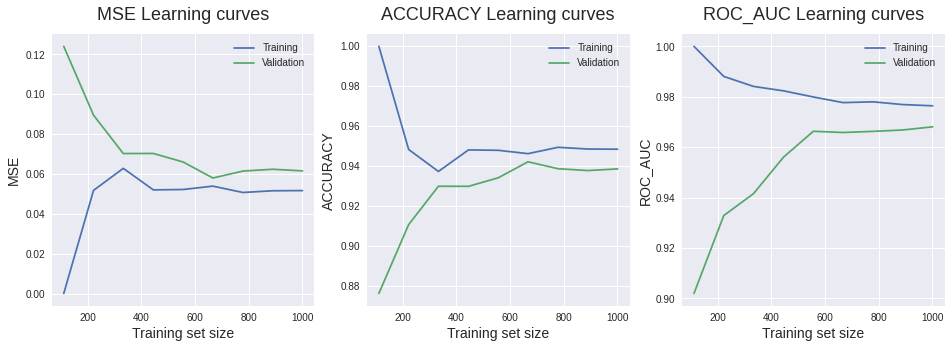

mACC:0.939
mAUC:0.966
<----------------------------------->



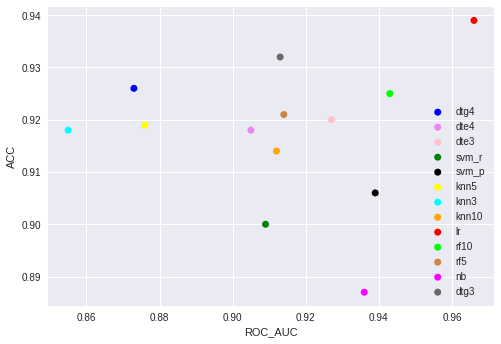

In [53]:
performance_comparer(X, y)

Vamos a ver que nos dicen los modelos acerca de los features

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [55]:
from Models.functions.feature_imp import clasifier_ft_importance_experiments, plot_feature_importance

Las estadísticas avanzadas parecieran ser las que llevan el mayor peso 

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Es

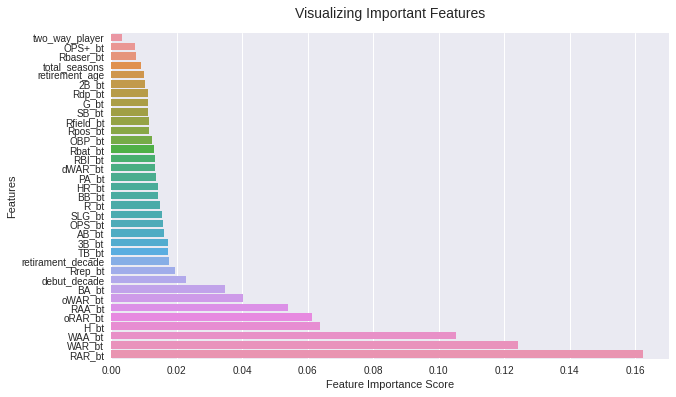

In [60]:
rf10_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf10_clf,X,y).sort_values())

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Es

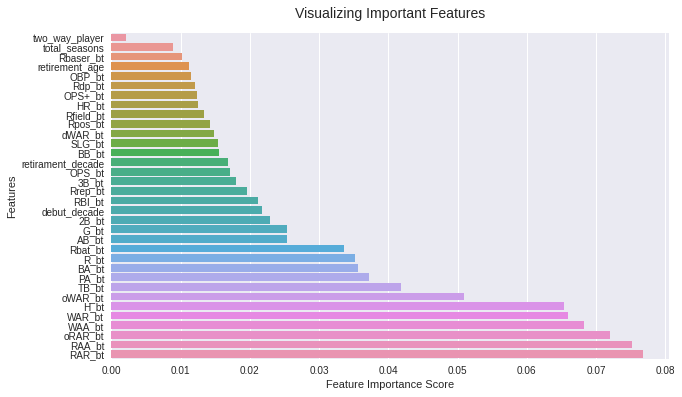

In [66]:
rf50_clf = RandomForestClassifier(n_estimators = 50, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf50_clf,X,y).sort_values())

/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Estudios/4to/Periodismo de datos/Proyecto MLB/DJ-MLB-Hall-Fame/Models/../Models/functions/feature_imp.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf_instance.fit(X_train, y_train)
/media/abel/LENOVO/AMS/Es

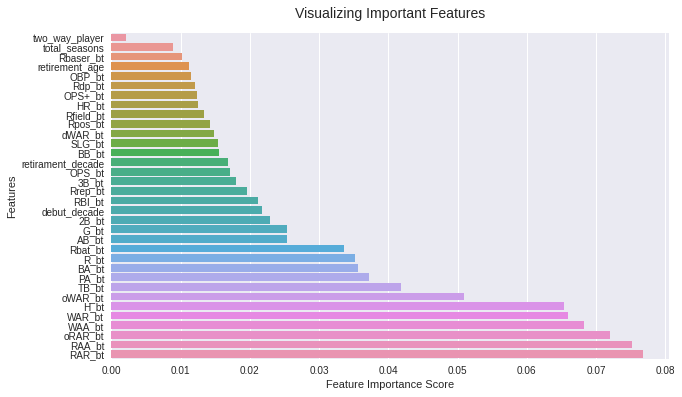

In [67]:
rf100_clf = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 42)
plot_feature_importance(clasifier_ft_importance_experiments(rf50_clf,X,y).sort_values())

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

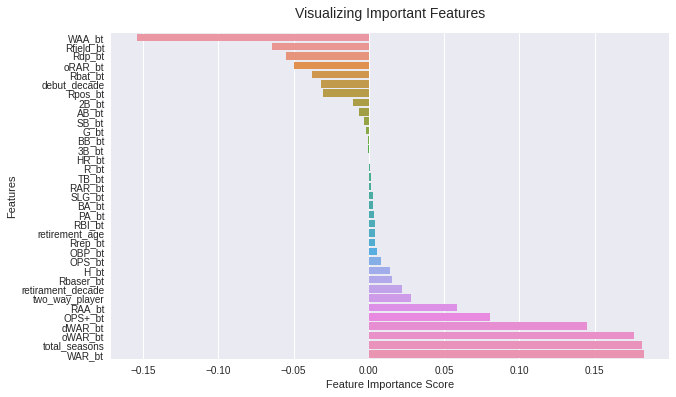

In [59]:
lr_clf = LogisticRegression(solver='liblinear', max_iter=10000)
plot_feature_importance(clasifier_ft_importance_experiments(lr_clf,X,y,True).sort_values())

Vamos a probar con los algoritmos de seleccion de features 

In [61]:
from sklearn.feature_selection import RFE, RFECV

def feature_selection_RFE(clf,X,y,n_features=5):
    rfe = RFE(estimator=clf, n_features_to_select=n_features)
    rfe.fit(X, y)
    for i in range(X.shape[1]):
        if rfe.support_[i]:
    	    print(f'Feature: {X.columns[i]}, Rank: {rfe.ranking_[i]}')

In [62]:
feature_selection_RFE(DecisionTreeClassifier(max_depth=4),X, np.ravel(y), 10)

Feature: retirement_age, Rank: 1
Feature: debut_decade, Rank: 1
Feature: AB_bt, Rank: 1
Feature: BA_bt, Rank: 1
Feature: G_bt, Rank: 1
Feature: RAA_bt, Rank: 1
Feature: RAR_bt, Rank: 1
Feature: R_bt, Rank: 1
Feature: WAA_bt, Rank: 1
Feature: WAR_bt, Rank: 1


El metodo de RFECV, selecciona automaticamente la cantidad de features

In [83]:
rfecv = RFECV(estimator=DecisionTreeClassifier())
rfecv.fit(X, np.ravel(y))
f = 0
for i in range(X.shape[1]):
    if rfecv.support_[i]:
        f+=1
        print(f'Feature: {X.columns[i]}, Rank: {rfecv.ranking_[i]}')
f

Feature: retirement_age, Rank: 1
Feature: debut_decade, Rank: 1
Feature: AB_bt, Rank: 1
Feature: BA_bt, Rank: 1
Feature: G_bt, Rank: 1
Feature: RAA_bt, Rank: 1
Feature: RAR_bt, Rank: 1
Feature: RBI_bt, Rank: 1
Feature: Rdp_bt, Rank: 1
Feature: Rrep_bt, Rank: 1


10

In [84]:
from numpy import mean
def automatic_feature_selection(estimators, X, y, n_repetition):
    features_selected  = {}
    count = 0
    for est in estimators:
        rfecv = RFECV(estimator=est)
        for r in range(n_repetition):
            count+=1
            rfecv.fit(X, np.ravel(y))
            for i in range(X.shape[1]):
                if rfecv.support_[i]:
                    feat = X.columns[i]
                    rank = rfecv.ranking_[i]
                    if features_selected.get(feat) == None:
                        features_selected[feat] = [1,rank]
                    else:
                        features_selected[feat][0]+=1
                        features_selected[feat][1]+=rank
    s_features = []
    for feat in features_selected.keys():
        n_selection = features_selected[feat][0]
        m_rank = features_selected[feat][1]/n_selection
        m_selection = (features_selected[feat][0]/count)*100
        s_features.append((feat,m_selection,m_rank))
    s_features.sort(key=lambda x: x[1], reverse=True)
    print(f"Total selections:{count}")
    return s_features
        

In [87]:
estimators = [DecisionTreeClassifier(max_depth=4)]
automatic_feature_selection(estimators, X, y, 35)

Total selections:35


[('BA_bt', 100.0, 1.0),
 ('RAR_bt', 100.0, 1.0),
 ('RAA_bt', 34.285714285714285, 1.0),
 ('AB_bt', 25.71428571428571, 1.0),
 ('debut_decade', 17.142857142857142, 1.0),
 ('H_bt', 17.142857142857142, 1.0),
 ('WAA_bt', 8.571428571428571, 1.0),
 ('retirement_age', 2.857142857142857, 1.0),
 ('retirament_decade', 2.857142857142857, 1.0),
 ('total_seasons', 2.857142857142857, 1.0),
 ('two_way_player', 2.857142857142857, 1.0),
 ('2B_bt', 2.857142857142857, 1.0),
 ('3B_bt', 2.857142857142857, 1.0),
 ('BB_bt', 2.857142857142857, 1.0),
 ('G_bt', 2.857142857142857, 1.0),
 ('HR_bt', 2.857142857142857, 1.0),
 ('OBP_bt', 2.857142857142857, 1.0),
 ('OPS+_bt', 2.857142857142857, 1.0),
 ('OPS_bt', 2.857142857142857, 1.0),
 ('RBI_bt', 2.857142857142857, 1.0),
 ('R_bt', 2.857142857142857, 1.0),
 ('Rbaser_bt', 2.857142857142857, 1.0),
 ('Rbat_bt', 2.857142857142857, 1.0),
 ('Rdp_bt', 2.857142857142857, 1.0),
 ('Rfield_bt', 2.857142857142857, 1.0),
 ('Rpos_bt', 2.857142857142857, 1.0),
 ('Rrep_bt', 2.8571428

In [88]:
estimators = [LogisticRegression(max_iter=10000, solver="liblinear")]
automatic_feature_selection(estimators, X, y, 35)

Total selections:35


[('debut_decade', 100.0, 1.0),
 ('retirament_decade', 100.0, 1.0),
 ('total_seasons', 100.0, 1.0),
 ('two_way_player', 100.0, 1.0),
 ('2B_bt', 100.0, 1.0),
 ('AB_bt', 100.0, 1.0),
 ('H_bt', 100.0, 1.0),
 ('OBP_bt', 100.0, 1.0),
 ('OPS+_bt', 100.0, 1.0),
 ('OPS_bt', 100.0, 1.0),
 ('PA_bt', 100.0, 1.0),
 ('RAA_bt', 100.0, 1.0),
 ('RAR_bt', 100.0, 1.0),
 ('RBI_bt', 100.0, 1.0),
 ('Rbat_bt', 100.0, 1.0),
 ('Rdp_bt', 100.0, 1.0),
 ('Rfield_bt', 100.0, 1.0),
 ('Rpos_bt', 100.0, 1.0),
 ('SLG_bt', 100.0, 1.0),
 ('TB_bt', 100.0, 1.0),
 ('WAA_bt', 100.0, 1.0),
 ('WAR_bt', 100.0, 1.0),
 ('dWAR_bt', 100.0, 1.0),
 ('oRAR_bt', 100.0, 1.0),
 ('oWAR_bt', 100.0, 1.0)]

In [89]:
estimators = [DecisionTreeClassifier(max_depth=4), LogisticRegression(max_iter=10000, solver="liblinear")]
automatic_feature_selection(estimators, X, y, 35)

Total selections:70


[('RAR_bt', 100.0, 1.0),
 ('RAA_bt', 67.14285714285714, 1.0),
 ('AB_bt', 65.71428571428571, 1.0),
 ('H_bt', 55.714285714285715, 1.0),
 ('debut_decade', 55.714285714285715, 1.0),
 ('WAA_bt', 51.42857142857142, 1.0),
 ('BA_bt', 50.0, 1.0),
 ('retirament_decade', 50.0, 1.0),
 ('total_seasons', 50.0, 1.0),
 ('two_way_player', 50.0, 1.0),
 ('2B_bt', 50.0, 1.0),
 ('OBP_bt', 50.0, 1.0),
 ('OPS+_bt', 50.0, 1.0),
 ('OPS_bt', 50.0, 1.0),
 ('PA_bt', 50.0, 1.0),
 ('RBI_bt', 50.0, 1.0),
 ('Rbat_bt', 50.0, 1.0),
 ('Rdp_bt', 50.0, 1.0),
 ('Rfield_bt', 50.0, 1.0),
 ('Rpos_bt', 50.0, 1.0),
 ('SLG_bt', 50.0, 1.0),
 ('TB_bt', 50.0, 1.0),
 ('WAR_bt', 50.0, 1.0),
 ('dWAR_bt', 50.0, 1.0),
 ('oRAR_bt', 50.0, 1.0),
 ('oWAR_bt', 50.0, 1.0)]

Veamos la correlacion de las variables respecto al Target

In [66]:
df = select_features(inactive_plus_10_season, of_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
df_corr

HoF                  1.000000
RAR_bt               0.666286
WAR_bt               0.662117
RAA_bt               0.645070
oRAR_bt              0.643533
oWAR_bt              0.641832
WAA_bt               0.637266
R_bt                 0.579606
H_bt                 0.572234
TB_bt                0.563979
RBI_bt               0.548441
Rbat_bt              0.540969
2B_bt                0.526262
PA_bt                0.513718
AB_bt                0.505701
Rrep_bt              0.494471
G_bt                 0.471529
3B_bt                0.456437
BA_bt                0.451496
total_seasons        0.442838
BB_bt                0.428461
OPS+_bt              0.424527
OPS_bt               0.419865
OBP_bt               0.403352
SLG_bt               0.364399
retirement_age       0.341559
HR_bt                0.302640
SB_bt                0.254504
Rbaser_bt            0.219845
Rfield_bt            0.202712
debut_decade         0.156548
retirament_decade    0.114661
two_way_player       0.102975
dWAR_bt   

In [67]:
m_corr = df.corr()

In [68]:
m_corr

retirement_age  debut_decade  retirament_decade  \
retirement_age           1.000000     -0.042600           0.038180   
debut_decade            -0.042600      1.000000           0.988588   
retirament_decade        0.038180      0.988588           1.000000   
total_seasons            0.746863      0.012702           0.102996   
two_way_player           0.012842     -0.063335          -0.056358   
2B_bt                    0.498323      0.090308           0.145399   
3B_bt                    0.299738     -0.561667          -0.529541   
AB_bt                    0.539676      0.027915           0.089600   
BA_bt                    0.244450     -0.291057          -0.264745   
BB_bt                    0.397913      0.124866           0.176659   
G_bt                     0.574627      0.144961           0.212274   
HR_bt                    0.262429      0.413700           0.448462   
H_bt                     0.540047     -0.039026           0.022509   
OBP_bt                   0.209915     -0.124524          -0.095396   
OPS+_bt                  0.202514     -0.122930          -0.092416   
OPS_bt                   0.209658      0.099584           0.126442   
PA_bt                    0.540717      0.036289           0.098920   
RAA_bt                   0.350271     -0.142405          -0.094910   
RAR_bt                   0.453404     -0.079018          -0.021100   
RBI_bt                   0.467776      0.035705           0.089762   
R_bt                     0.507929     -0.112594          -0.054600   
Rbaser_bt                0.139260      0.058375           0.078196   
Rbat_bt                  0.302344     -0.090475          -0.048929   
Rdp_bt                   0.006196     -0.044469          -0.041433   
Rfield_bt                0.110920     -0.126519          -0.114555   
Rpos_bt                 -0.059058     -0.024839          -0.032444   
Rrep_bt                  0.528947      0.084877           0.146472   
SLG_bt                   0.177609      0.198744           0.220384   
TB_bt                    0.512746      0.089909           0.149741   
WAA_bt                   0.348552     -0.103713          -0.055259   
WAR_bt                   0.448453     -0.077735          -0.019626   
dWAR_bt                  0.018661     -0.065311          -0.063714   
oRAR_bt                  0.444720     -0.050512           0.006845   
oWAR_bt                  0.440788     -0.062955          -0.005478   
SB_bt                    0.242352     -0.244826          -0.218204   
HoF                      0.341559     -0.156548          -0.114661   

                   total_seasons  two_way_player     2B_bt     3B_bt  \
retirement_age          0.746863        0.012842  0.498323  0.299738   
debut_decade            0.012702       -0.063335  0.090308 -0.561667   
retirament_decade       0.102996       -0.056358  0.145399 -0.529541   
total_seasons           1.000000        0.064811  0.676722  0.368310   
two_way_player          0.064811        1.000000  0.038820  0.058387   
2B_bt                   0.676722        0.038820  1.000000  0.493234   
3B_bt                   0.368310        0.058387  0.493234  1.000000   
AB_bt                   0.759228        0.055507  0.892886  0.533166   
BA_bt                   0.218640        0.056470  0.492935  0.537907   
BB_bt                   0.570770        0.091868  0.661007  0.268289   
G_bt                    0.817711        0.051780  0.859589  0.431347   
HR_bt                   0.416739        0.085470  0.556100 -0.087258   
H_bt                    0.737185        0.066668  0.921927  0.611654   
OBP_bt                  0.198057        0.066679  0.390987  0.321390   
OPS+_bt                 0.239762        0.087899  0.448382  0.325913   
OPS_bt                  0.232316        0.080062  0.521885  0.219817   
PA_bt                   0.761099        0.060840  0.891982  0.521663   
RAA_bt                  0.464761        0.163195  0.605474  0.475868   
RAR_bt                  0.619494        0.144232  0.771705  

<AxesSubplot:>

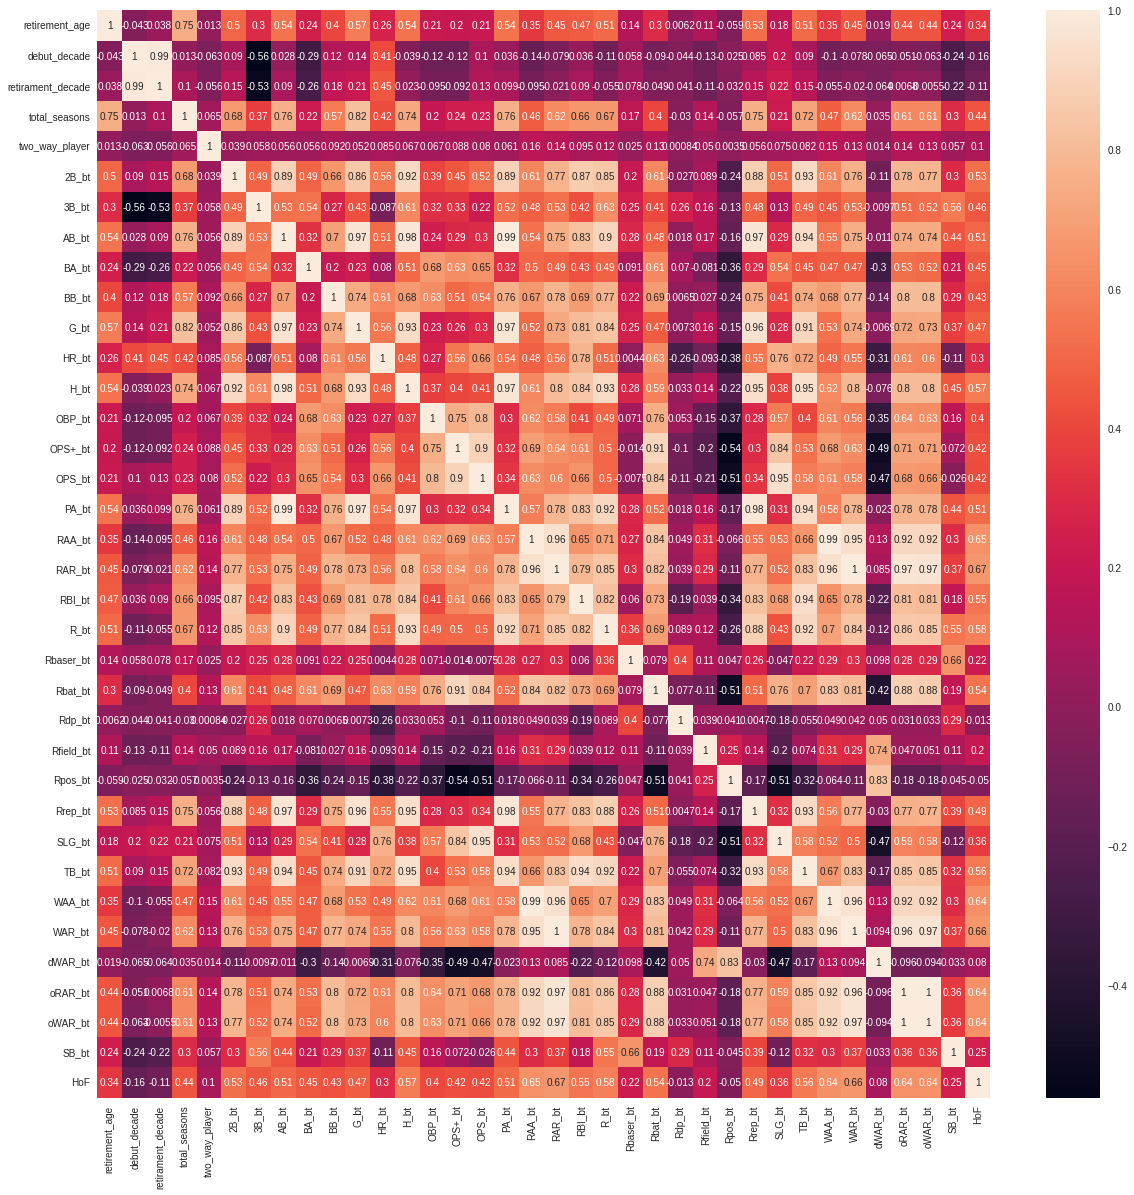

In [69]:
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,20
sns.heatmap(m_corr, annot=True)

Pongamos 80% como limite

In [70]:
feat_more_corr = df_corr[df_corr > 0.79].index.to_list()[1:]
feat_more_corr

[]

In [71]:
#Probemos con 60%

feat_more_corr = df_corr[df_corr > 0.6].index.to_list()[1:]
feat_more_corr

['RAR_bt', 'WAR_bt', 'RAA_bt', 'oRAR_bt', 'oWAR_bt', 'WAA_bt']

In [72]:
#Probemos con 50%

feat_more_corr = df_corr[df_corr > 0.5].index.to_list()[1:]
print(len(feat_more_corr))
feat_more_corr

14


['RAR_bt',
 'WAR_bt',
 'RAA_bt',
 'oRAR_bt',
 'oWAR_bt',
 'WAA_bt',
 'R_bt',
 'H_bt',
 'TB_bt',
 'RBI_bt',
 'Rbat_bt',
 '2B_bt',
 'PA_bt',
 'AB_bt']

In [73]:
#Probemos con 30%

feat_more_corr = df_corr[df_corr > 0.3].index.to_list()[1:]
print(len(feat_more_corr))
feat_more_corr

26


['RAR_bt',
 'WAR_bt',
 'RAA_bt',
 'oRAR_bt',
 'oWAR_bt',
 'WAA_bt',
 'R_bt',
 'H_bt',
 'TB_bt',
 'RBI_bt',
 'Rbat_bt',
 '2B_bt',
 'PA_bt',
 'AB_bt',
 'Rrep_bt',
 'G_bt',
 '3B_bt',
 'BA_bt',
 'total_seasons',
 'BB_bt',
 'OPS+_bt',
 'OPS_bt',
 'OBP_bt',
 'SLG_bt',
 'retirement_age',
 'HR_bt']

Vamos a quitarnos aquellos features con alta correlacion, la mayoria de ellos estadisticas calculadas a partir de otras

In [35]:
reduced_features = ['total_seasons','WAR_bt', 'SLG_bt', 'OBP_bt', '2B_bt','3B_bt','R_bt', 'Rfield_bt','RBI_bt', 'G_bt','HR_bt','H_bt', 'SB_bt' ]

In [36]:
X_r = select_features(X, reduced_features)
X_r.reset_index(drop=True, inplace=True)

In [37]:
df = select_features(inactive_plus_10_season, reduced_features+['HoF'])

df_corr = df.corr()['HoF'].abs().sort_values(ascending=False)
df_corr

HoF              1.000000
WAR_bt           0.662117
R_bt             0.579606
H_bt             0.572234
RBI_bt           0.548441
2B_bt            0.526262
G_bt             0.471529
3B_bt            0.456437
total_seasons    0.442838
OBP_bt           0.403352
SLG_bt           0.364399
SLG_bt           0.364399
HR_bt            0.302640
SB_bt            0.254504
Rfield_bt        0.202712
Name: HoF, dtype: float64

In [81]:
m_corr = df.corr()

<AxesSubplot:>

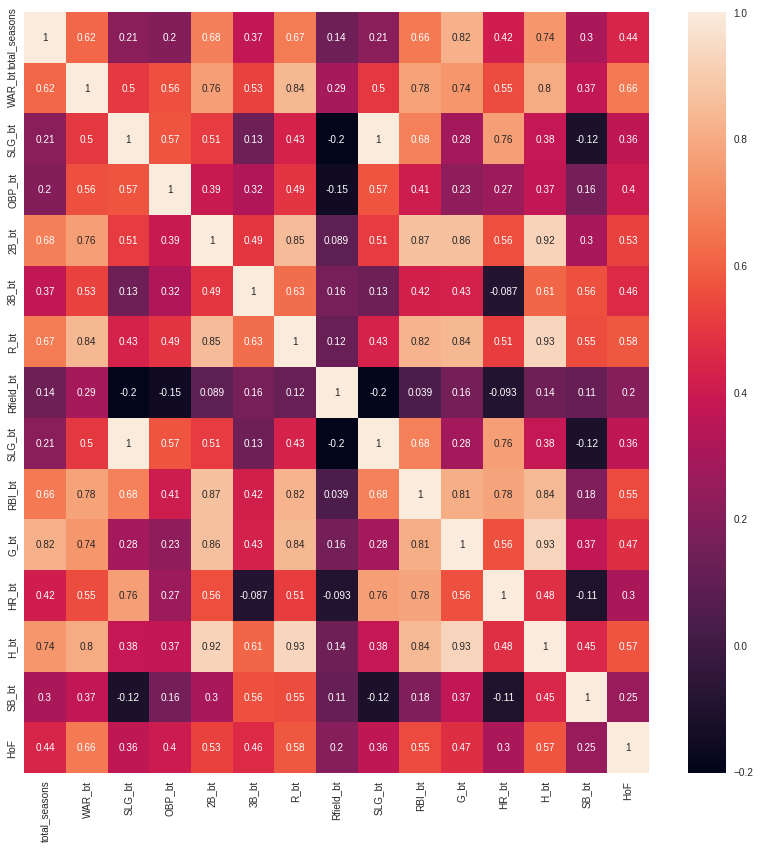

In [83]:
rcParams['figure.figsize'] = 14,14
sns.heatmap(m_corr, annot=True)

Probamos nuevamente los modelos

DecisionTree Gini depth=4


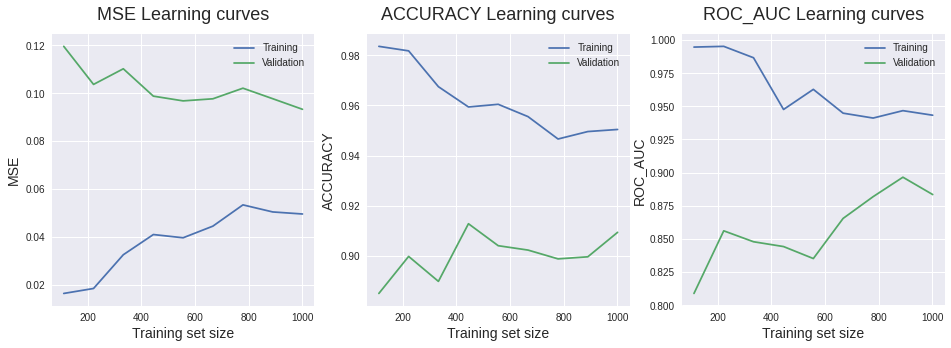

mACC:0.9
mAUC:0.881
<----------------------------------->

DecisionTree Entropy depth=4


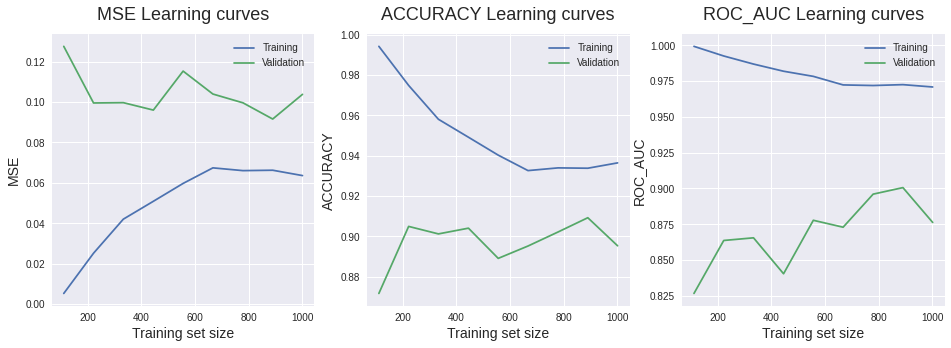

mACC:0.902
mAUC:0.89
<----------------------------------->

DecisionTree Gini depth=3


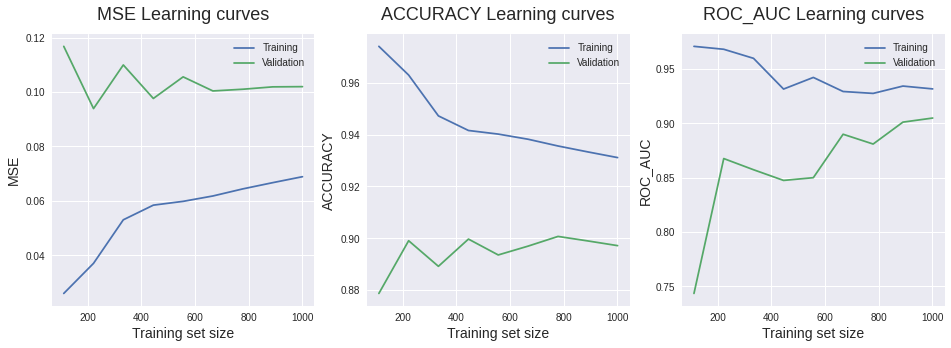

mACC:0.9
mAUC:0.881
<----------------------------------->

DecisionTree Entropy depth=3


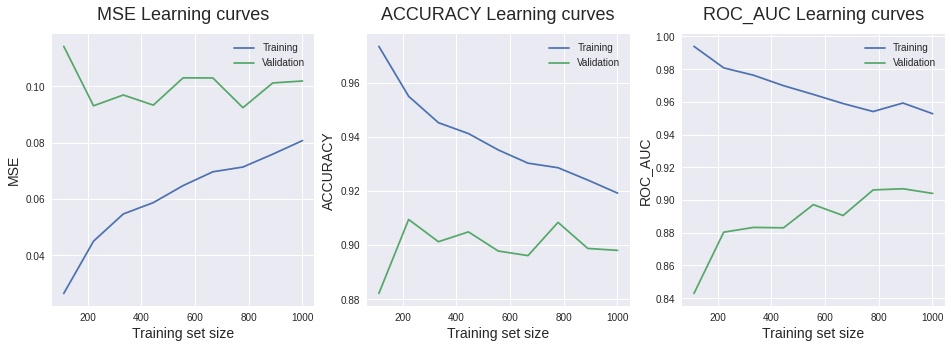

mACC:0.902
mAUC:0.89
<----------------------------------->

SVM kernel=poly


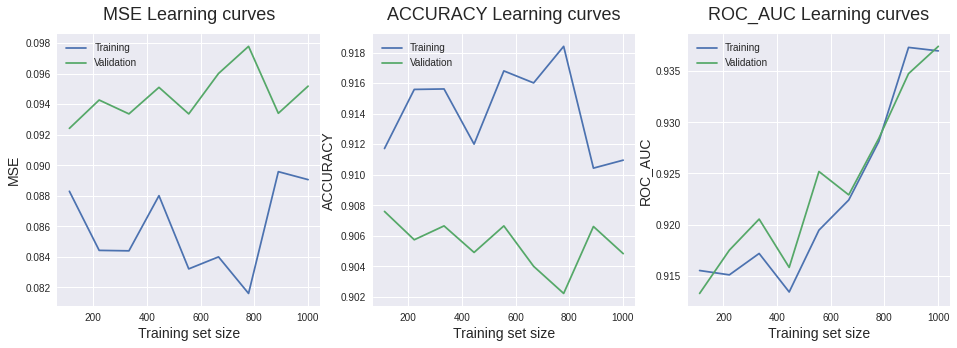

mACC:0.904
mAUC:0.929
<----------------------------------->

SVM kernel=rbf


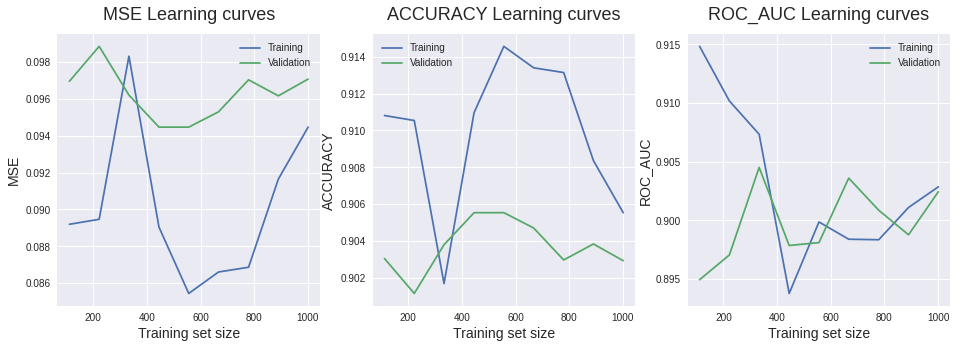

mACC:0.904
mAUC:0.901
<----------------------------------->

Random Forest estimators=10


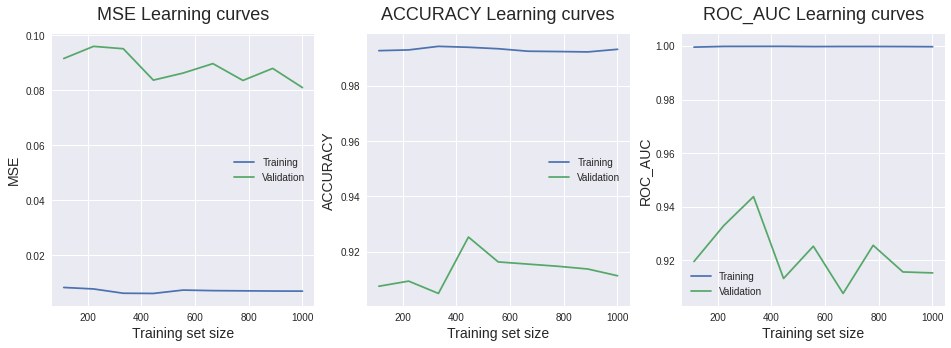

mACC:0.915
mAUC:0.916
<----------------------------------->

Random Forest estimators=5


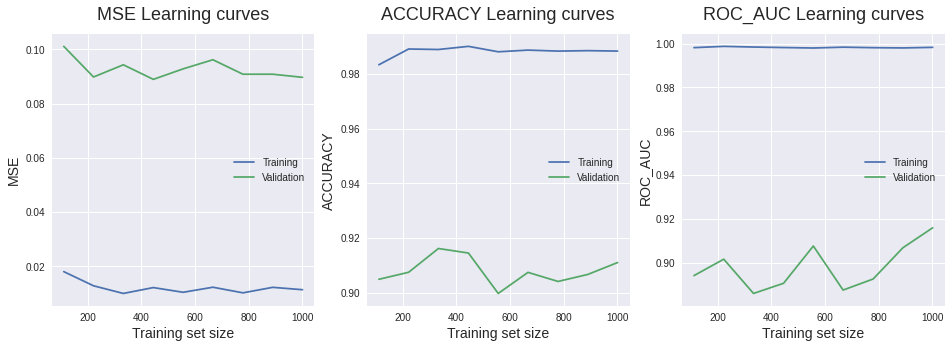

mACC:0.906
mAUC:0.896
<----------------------------------->

Naive Bayes


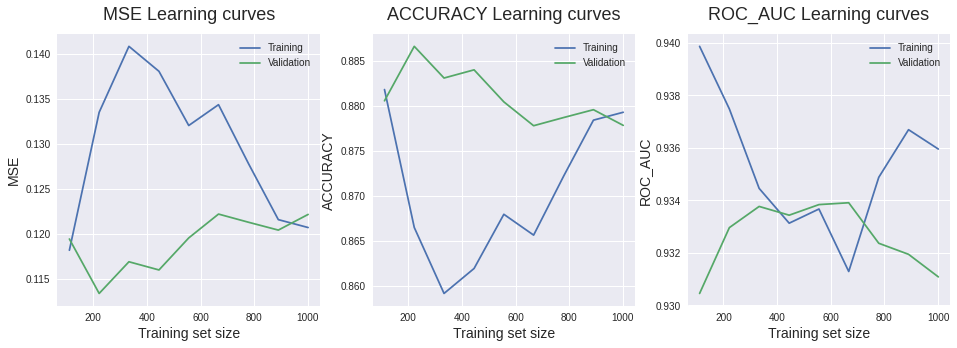

mACC:0.879
mAUC:0.933
<----------------------------------->

3NN


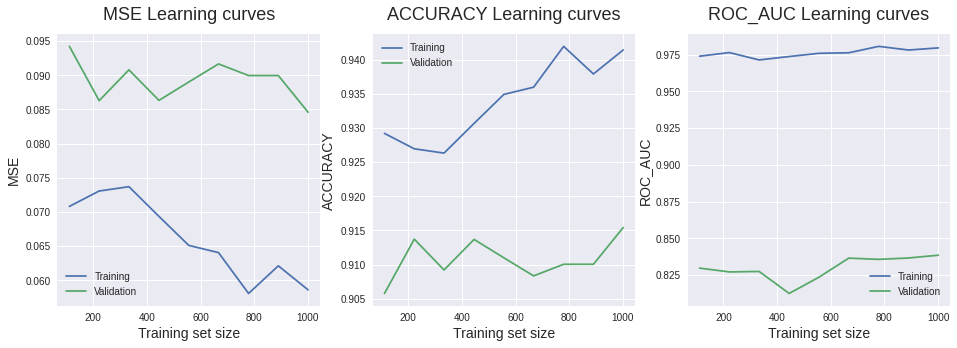

mACC:0.909
mAUC:0.836
<----------------------------------->

5NN


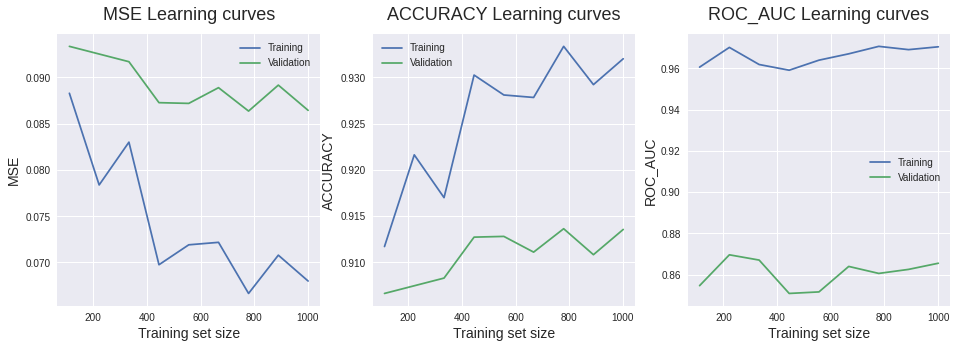

mACC:0.912
mAUC:0.862
<----------------------------------->

10NN


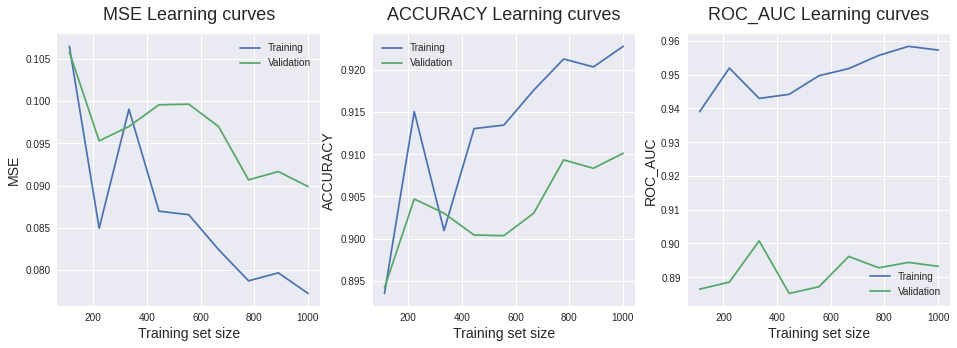

mACC:0.907
mAUC:0.894
<----------------------------------->

LogisticRegression


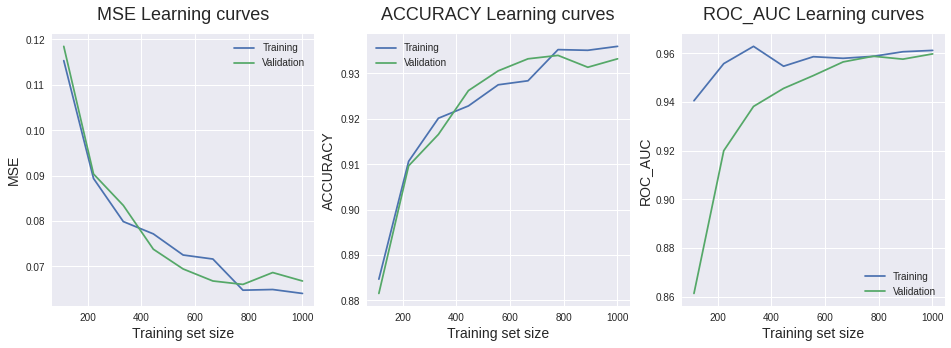

mACC:0.933
mAUC:0.958
<----------------------------------->



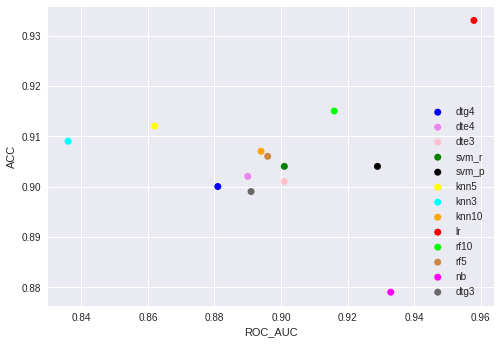

In [48]:
performance_comparer(X_r, y)

Vamos a standarizar los datos

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
X_t = sc.fit_transform(X_r)

DecisionTree Gini depth=4


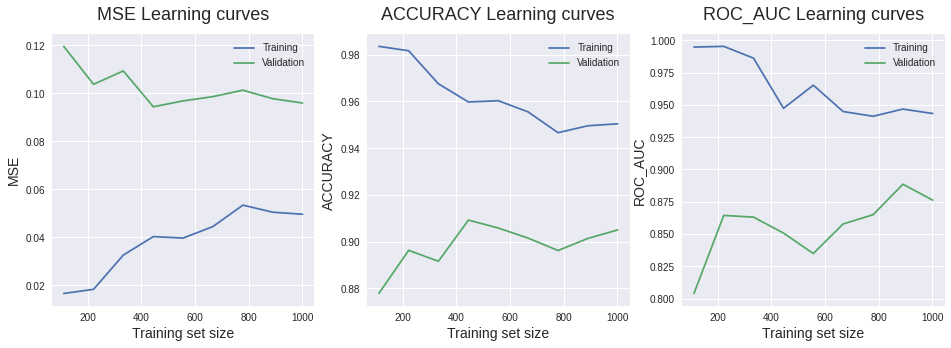

mACC:0.9
mAUC:0.87
<----------------------------------->

DecisionTree Entropy depth=4


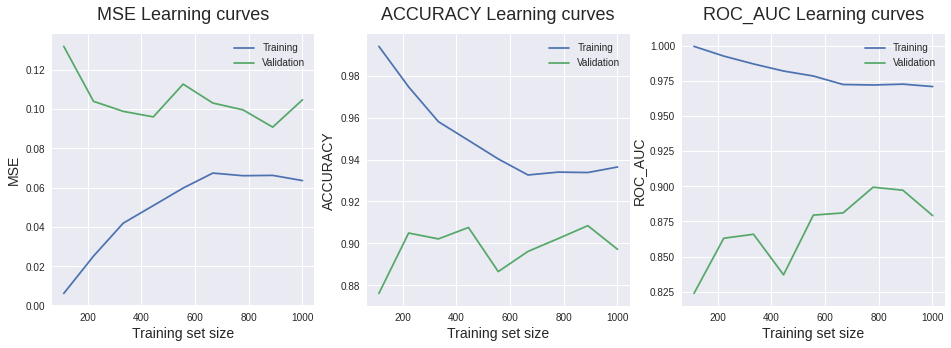

mACC:0.902
mAUC:0.893
<----------------------------------->

DecisionTree Gini depth=3


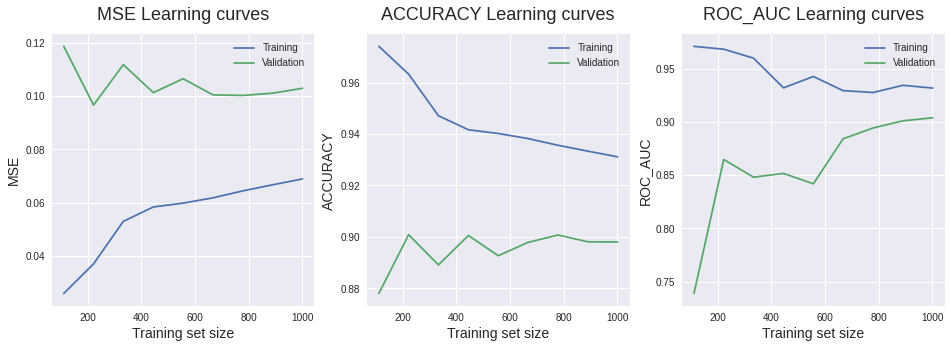

mACC:0.9
mAUC:0.87
<----------------------------------->

DecisionTree Entropy depth=3


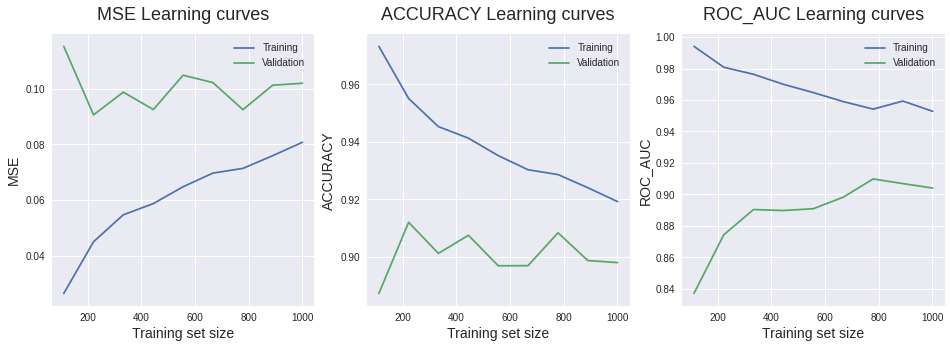

mACC:0.902
mAUC:0.893
<----------------------------------->

SVM kernel=poly


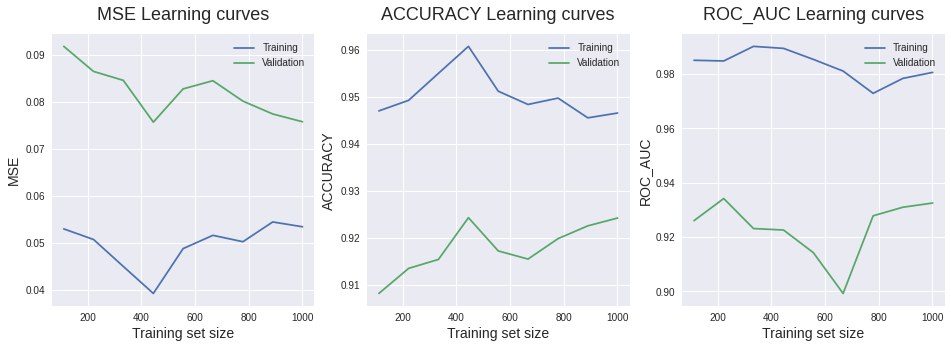

mACC:0.919
mAUC:0.919
<----------------------------------->

SVM kernel=rbf


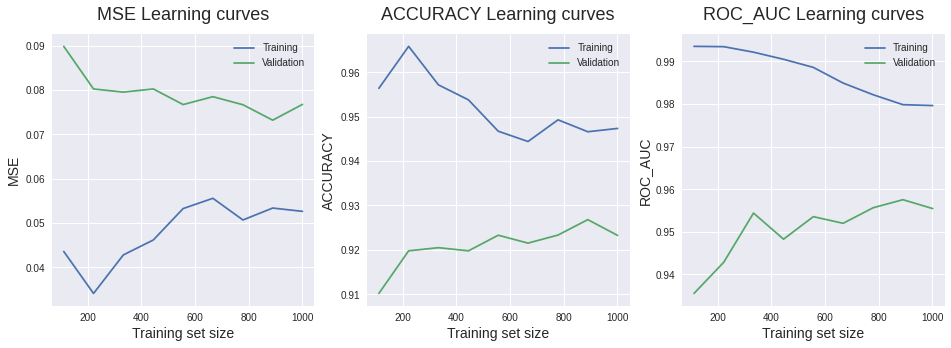

mACC:0.924
mAUC:0.955
<----------------------------------->

Random Forest estimators=10


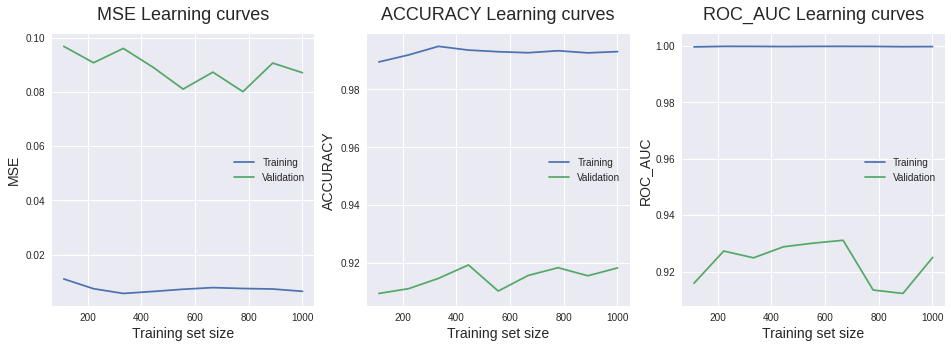

mACC:0.916
mAUC:0.919
<----------------------------------->

Random Forest estimators=5


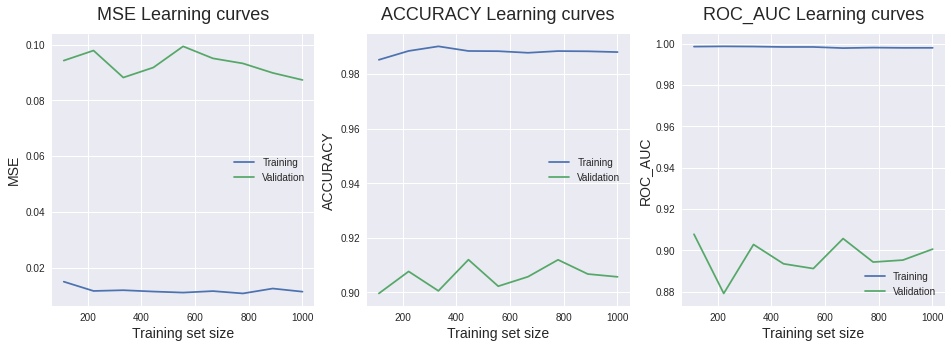

mACC:0.908
mAUC:0.898
<----------------------------------->

Naive Bayes


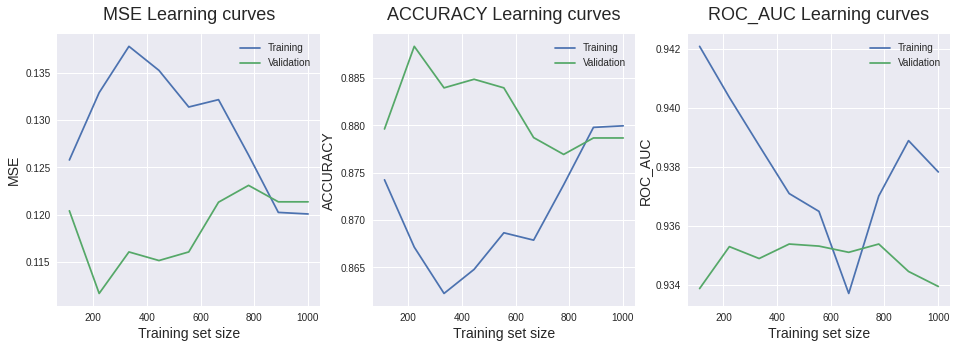

mACC:0.878
mAUC:0.935
<----------------------------------->

3NN


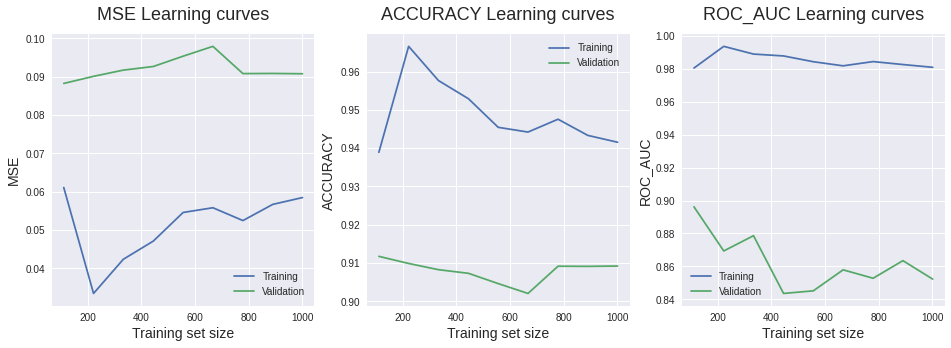

mACC:0.907
mAUC:0.858
<----------------------------------->

5NN


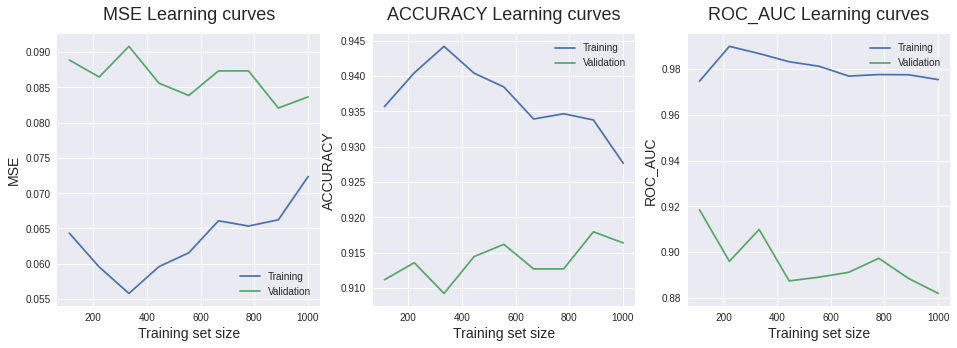

mACC:0.914
mAUC:0.892
<----------------------------------->

10NN


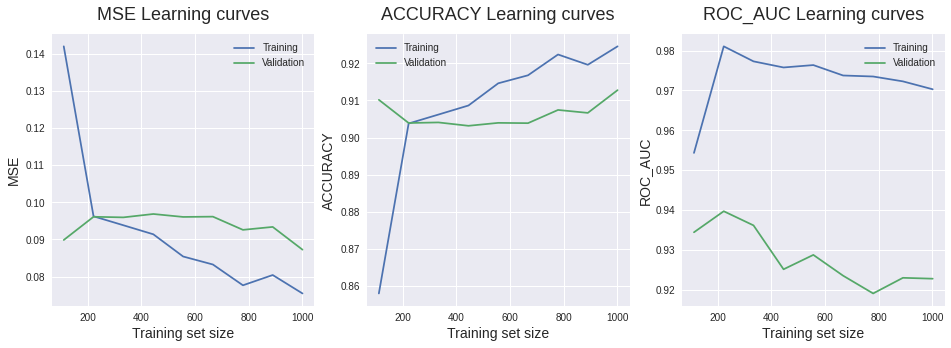

mACC:0.906
mAUC:0.922
<----------------------------------->

LogisticRegression


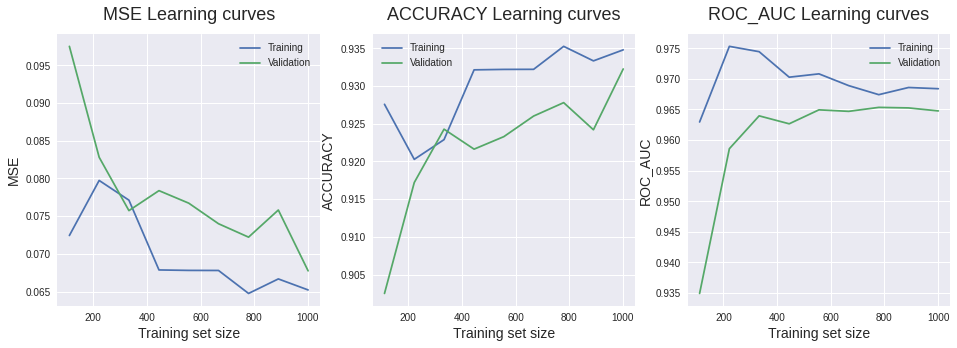

mACC:0.926
mAUC:0.965
<----------------------------------->



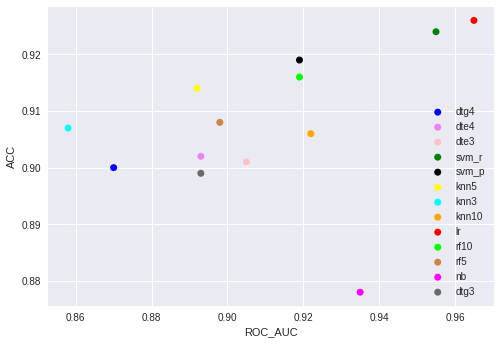

In [51]:
performance_comparer(X_t, y)

Vamos a utilizar las tecnicas de reduccion de dimensiones 

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=3)
X_pca_r = pca.fit_transform(X_t)
print('explained variance ratio (for components): %s'
                        %str(pca.explained_variance_ratio_))

explained variance ratio (for components): [0.53981865 0.18003284 0.09051403]


In [42]:
from Models.functions.data_set_plot import plot_2d_data, plot_3d_data


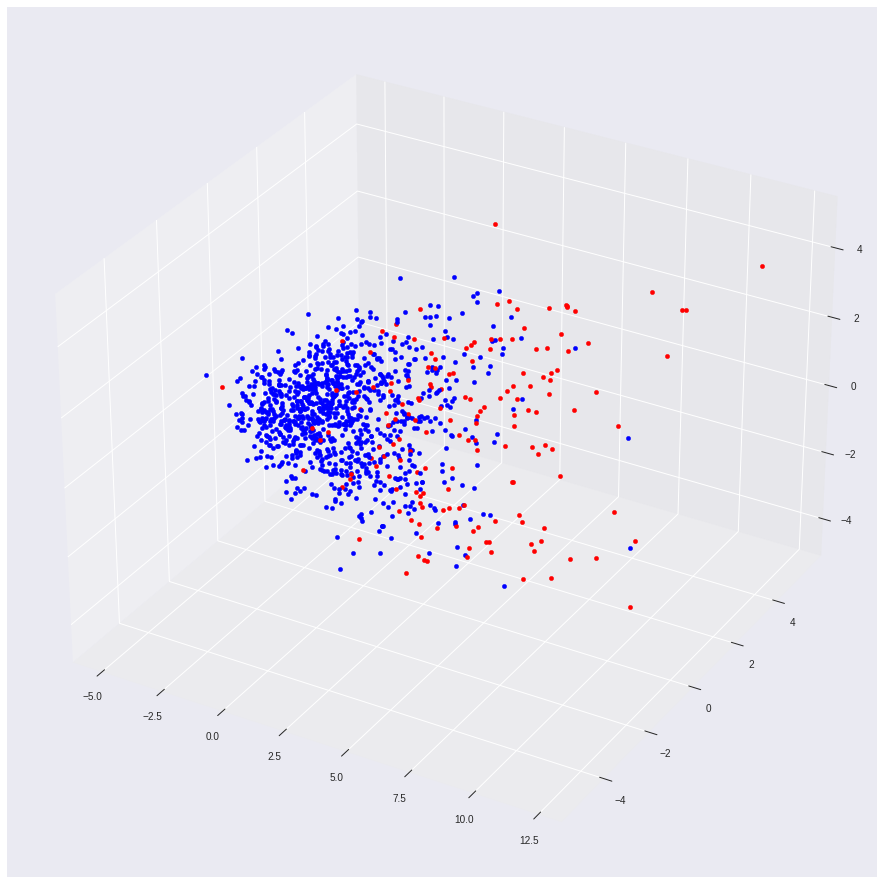

In [43]:
plot_3d_data(X_pca_r,y.to_numpy())

DecisionTree Gini depth=4


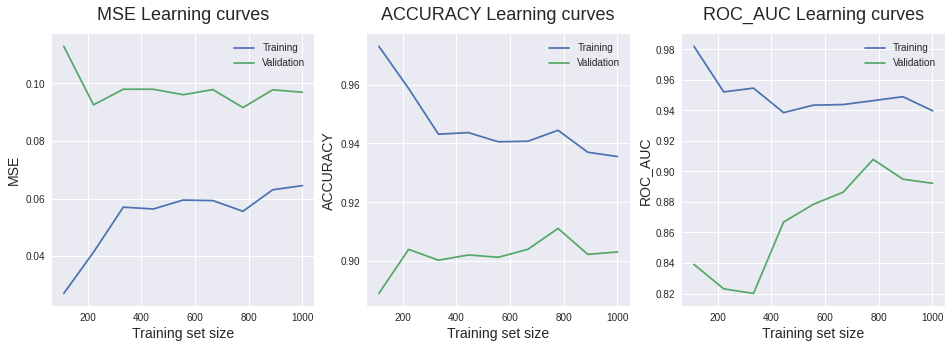

mACC:0.906
mAUC:0.896
<----------------------------------->

DecisionTree Entropy depth=4


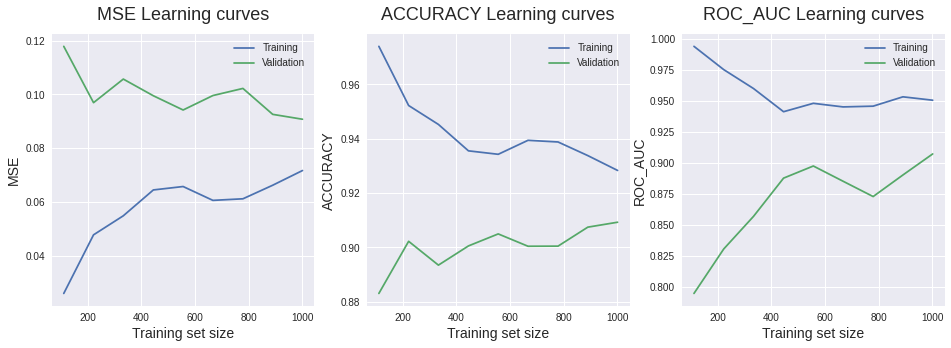

mACC:0.903
mAUC:0.883
<----------------------------------->

DecisionTree Gini depth=3


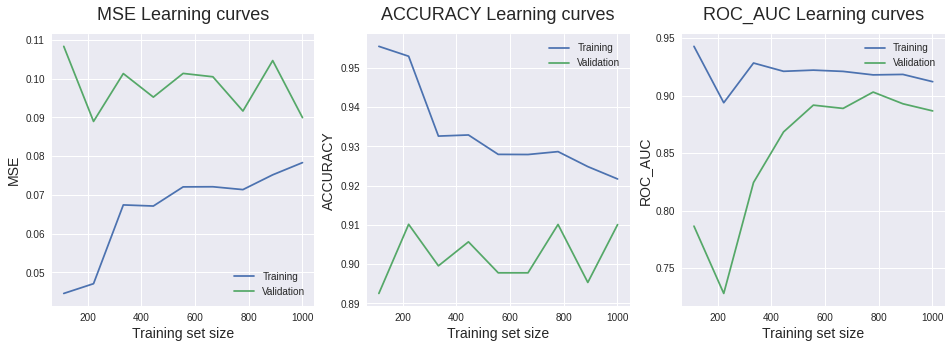

mACC:0.906
mAUC:0.896
<----------------------------------->

DecisionTree Entropy depth=3


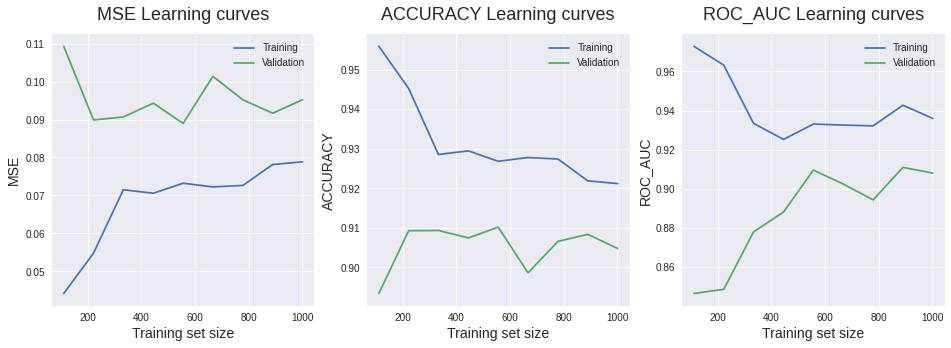

mACC:0.903
mAUC:0.883
<----------------------------------->

SVM kernel=poly


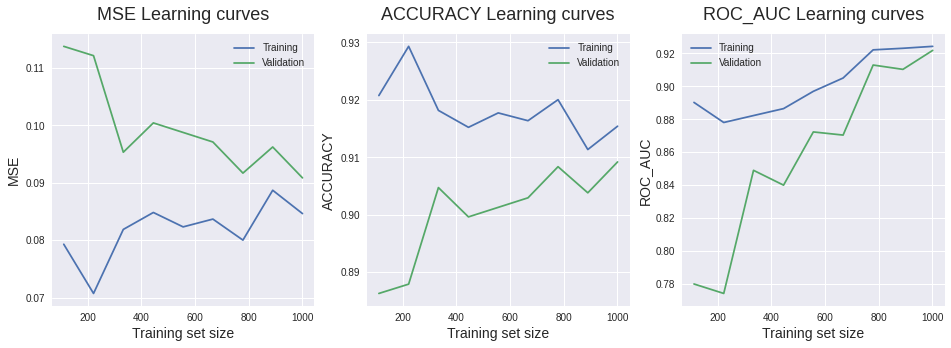

mACC:0.905
mAUC:0.898
<----------------------------------->

SVM kernel=rbf


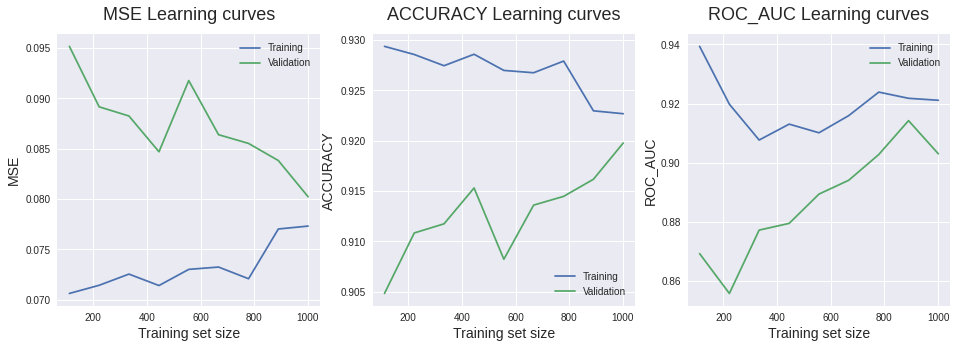

mACC:0.915
mAUC:0.904
<----------------------------------->

Random Forest estimators=10


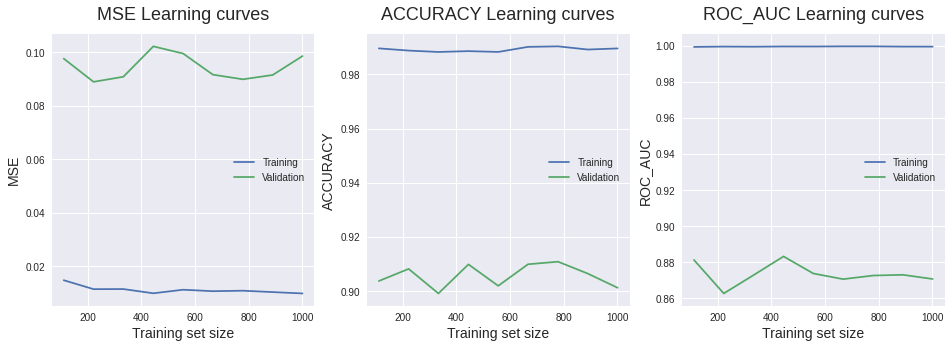

mACC:0.909
mAUC:0.872
<----------------------------------->

Random Forest estimators=5


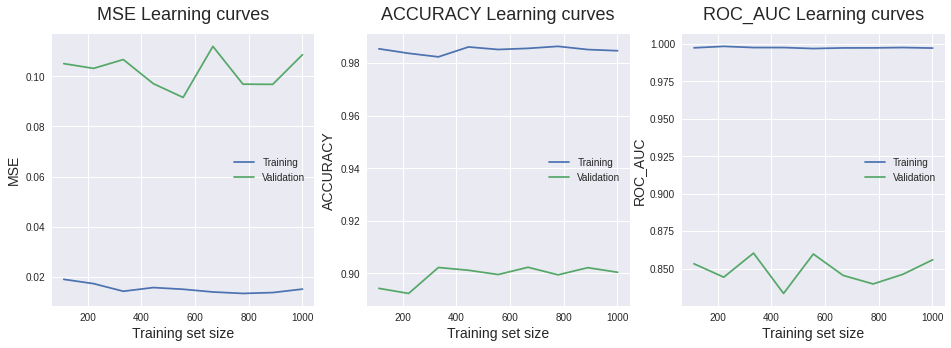

mACC:0.901
mAUC:0.844
<----------------------------------->

Naive Bayes


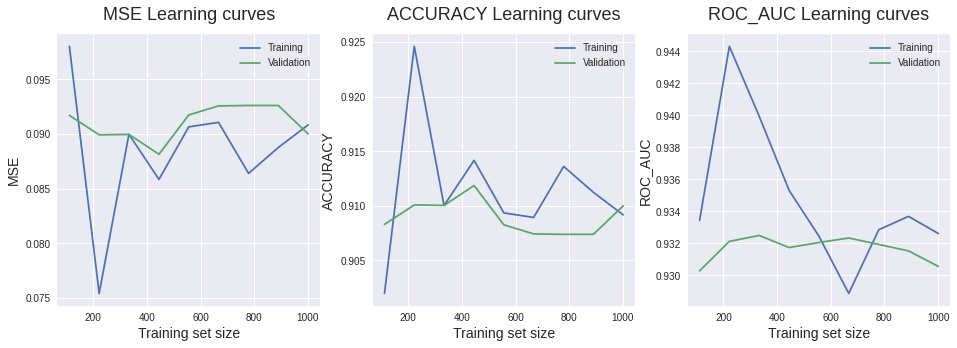

mACC:0.907
mAUC:0.932
<----------------------------------->

3NN


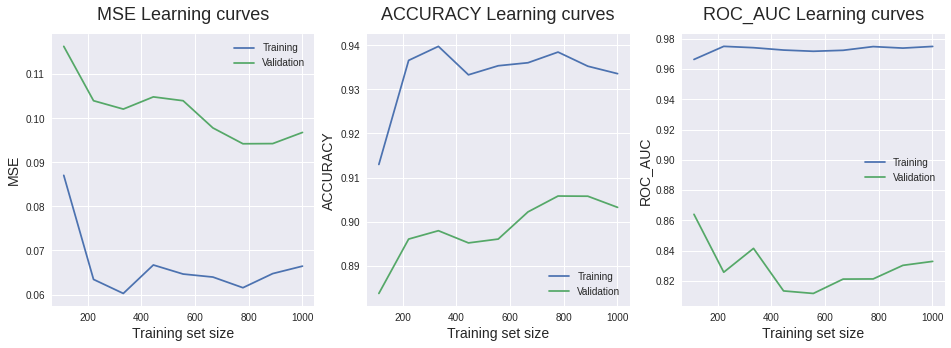

mACC:0.905
mAUC:0.824
<----------------------------------->

5NN


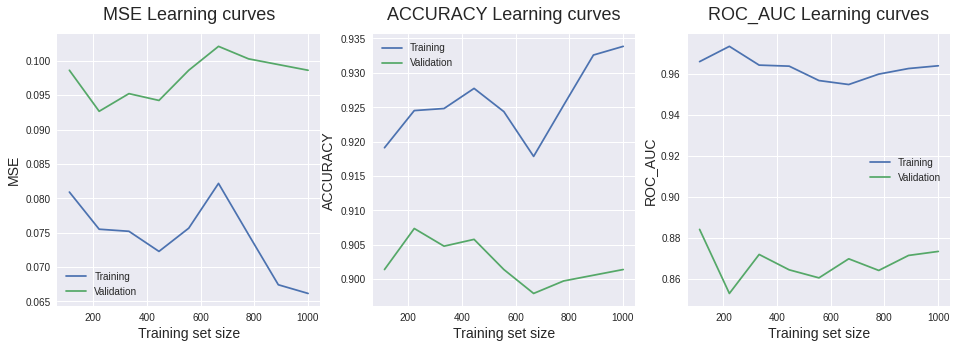

mACC:0.899
mAUC:0.869
<----------------------------------->

10NN


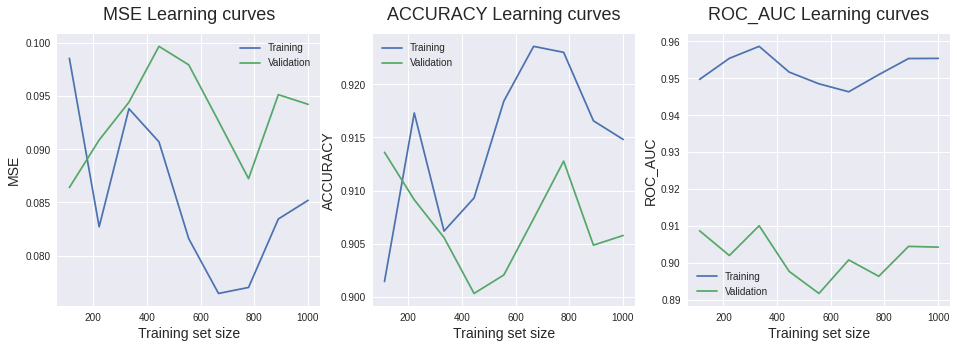

mACC:0.908
mAUC:0.9
<----------------------------------->

LogisticRegression


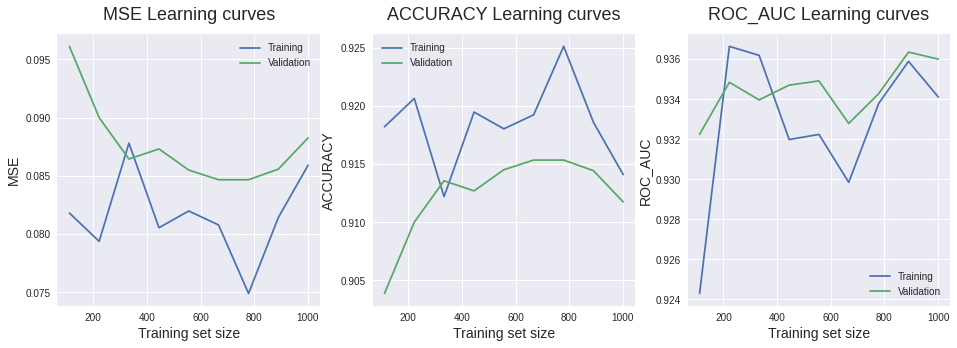

mACC:0.915
mAUC:0.934
<----------------------------------->



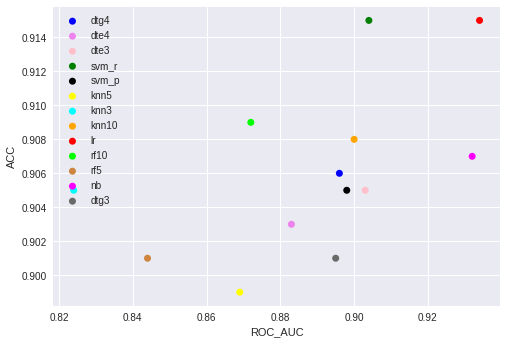

In [46]:
performance_comparer(X_pca_r, y)

In [51]:
from sklearn.decomposition import KernelPCA

In [66]:
kpca = KernelPCA(n_components=3, kernel='poly')
X_kpca_r = kpca.fit_transform(X_t)

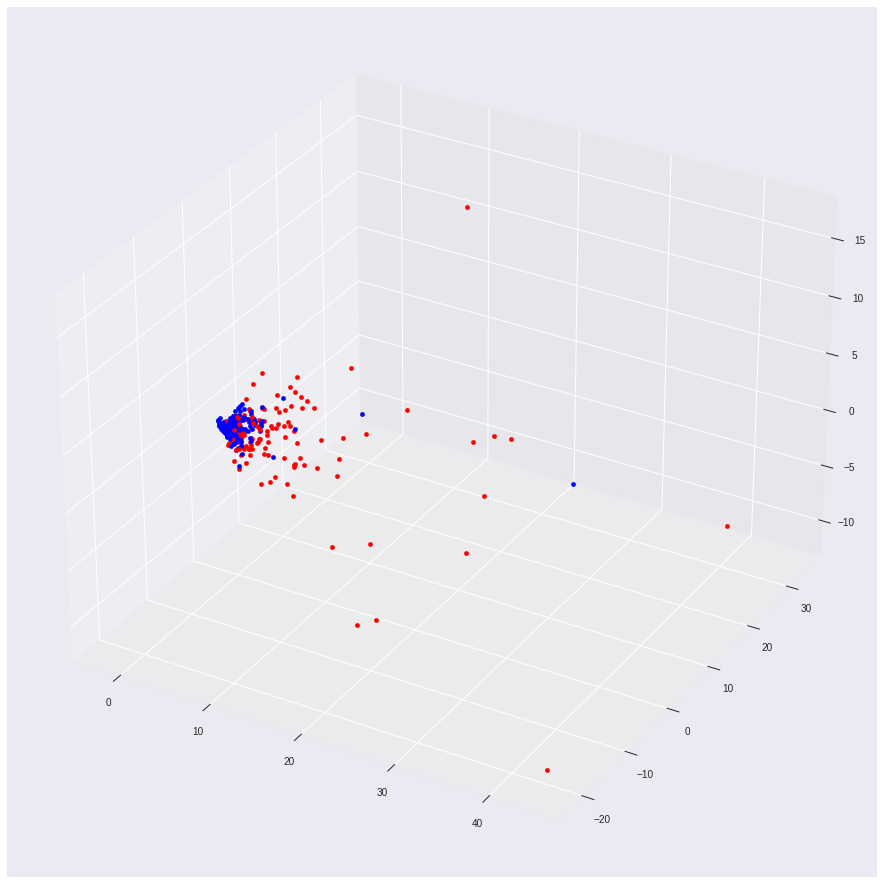

In [67]:
plot_3d_data(X_kpca_r,y.to_numpy())

DecisionTree Gini depth=4


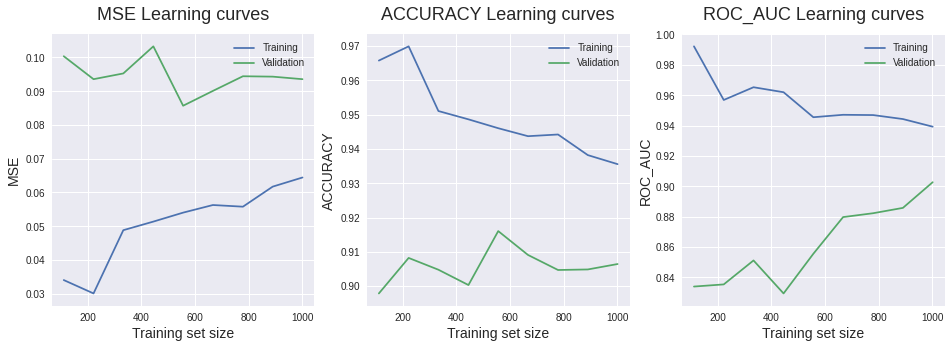

mACC:0.906
mAUC:0.883
<----------------------------------->

DecisionTree Entropy depth=4


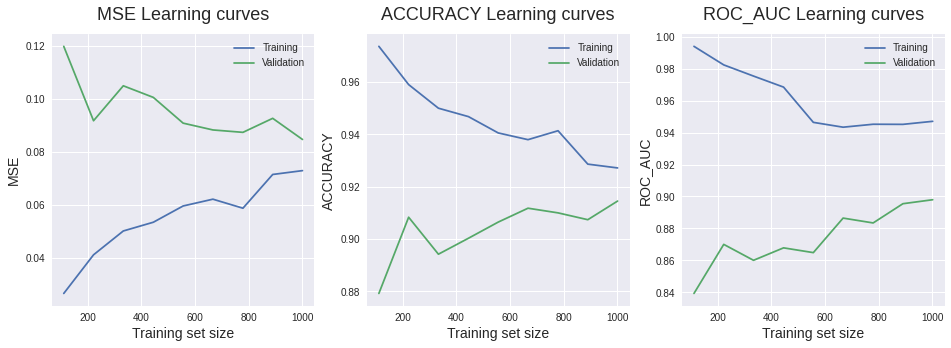

mACC:0.91
mAUC:0.888
<----------------------------------->

DecisionTree Gini depth=3


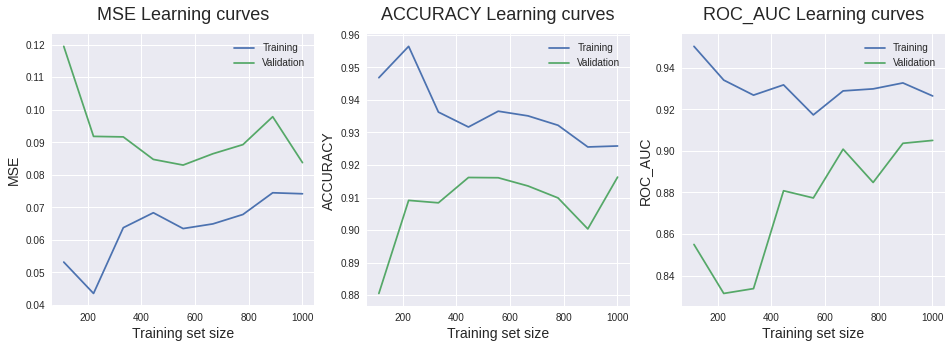

mACC:0.906
mAUC:0.883
<----------------------------------->

DecisionTree Entropy depth=3


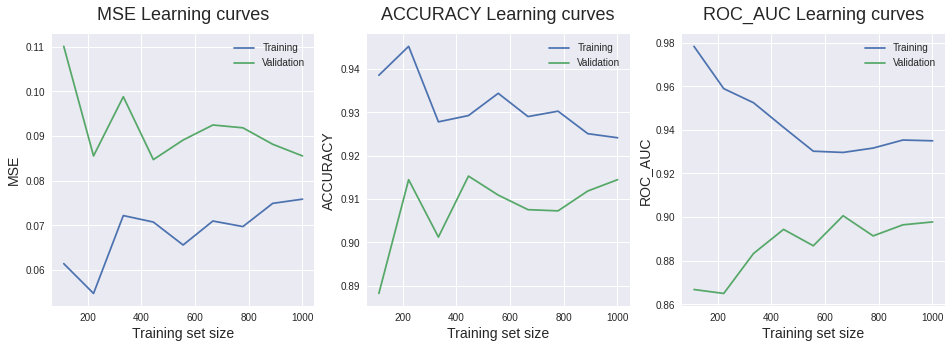

mACC:0.91
mAUC:0.888
<----------------------------------->

SVM kernel=poly


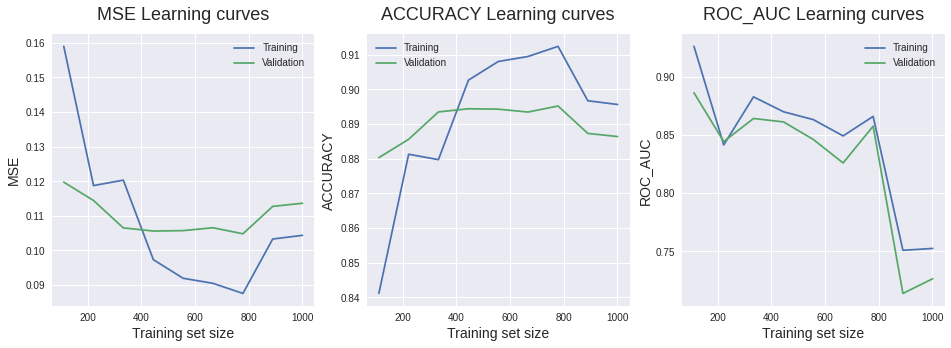

mACC:0.892
mAUC:0.799
<----------------------------------->

SVM kernel=rbf


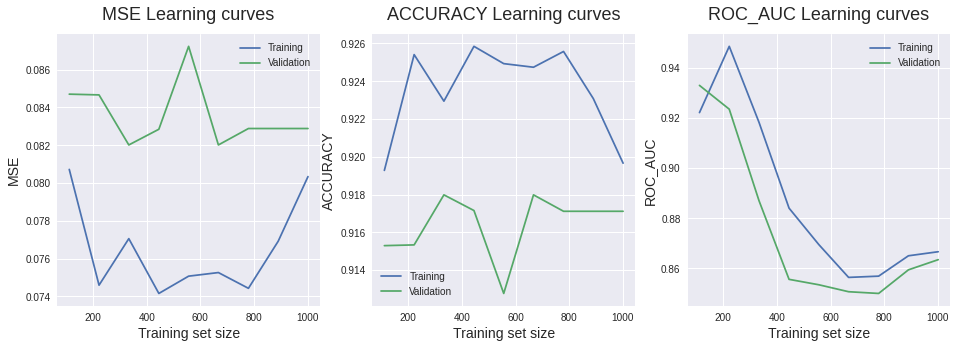

mACC:0.917
mAUC:0.853
<----------------------------------->

Random Forest estimators=10


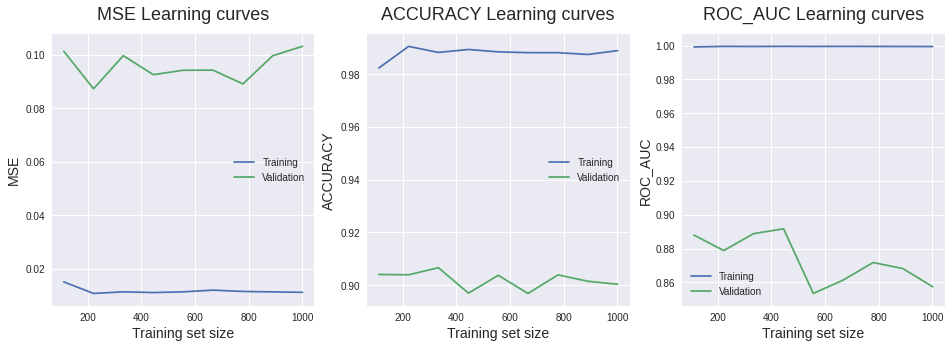

mACC:0.901
mAUC:0.867
<----------------------------------->

Random Forest estimators=5


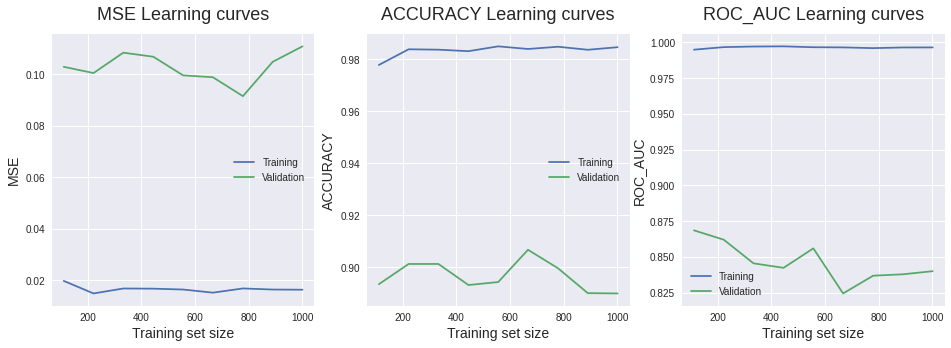

mACC:0.899
mAUC:0.833
<----------------------------------->

Naive Bayes


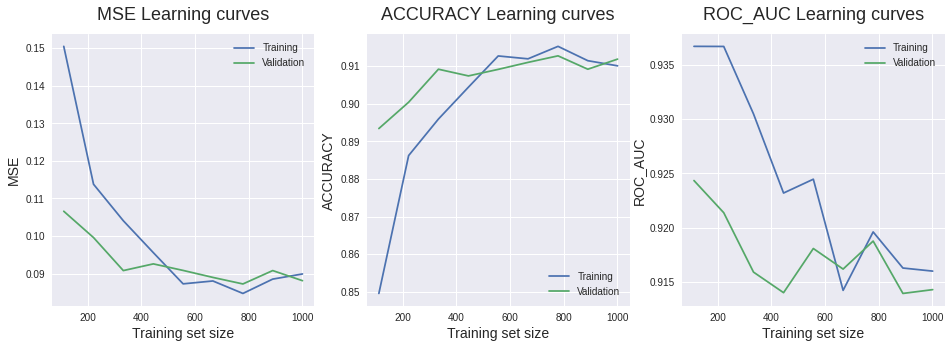

mACC:0.911
mAUC:0.916
<----------------------------------->

3NN


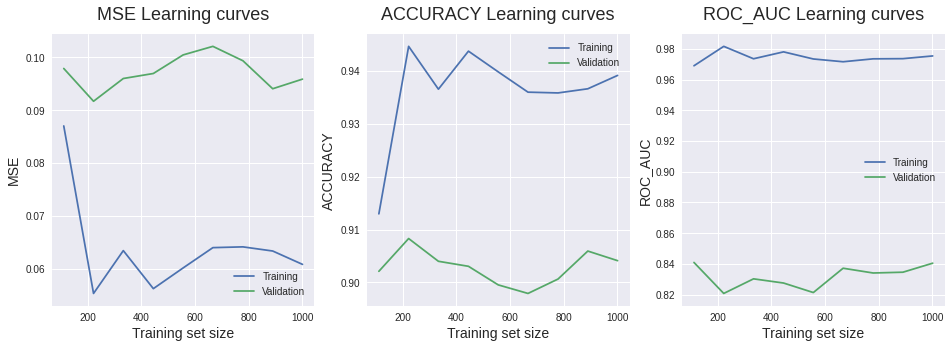

mACC:0.901
mAUC:0.835
<----------------------------------->

5NN


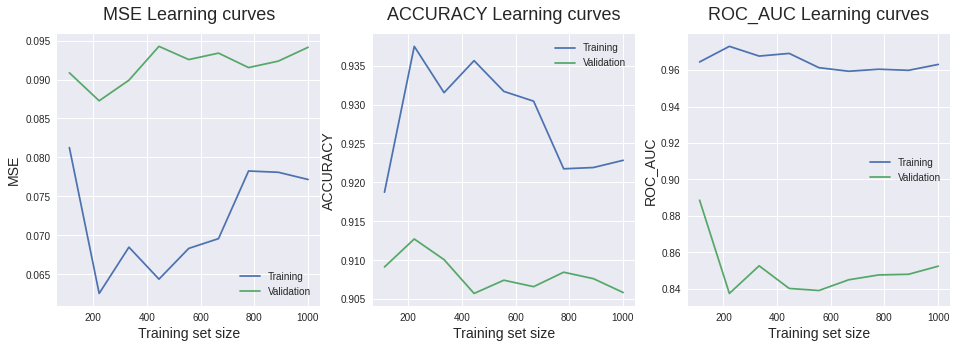

mACC:0.908
mAUC:0.847
<----------------------------------->

10NN


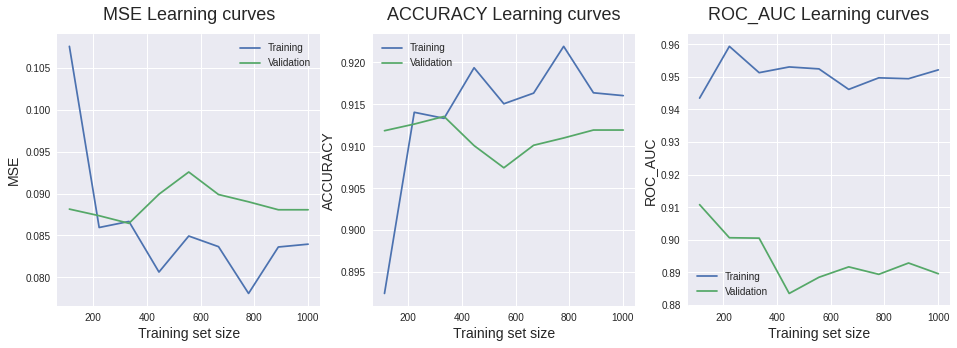

mACC:0.911
mAUC:0.891
<----------------------------------->

LogisticRegression


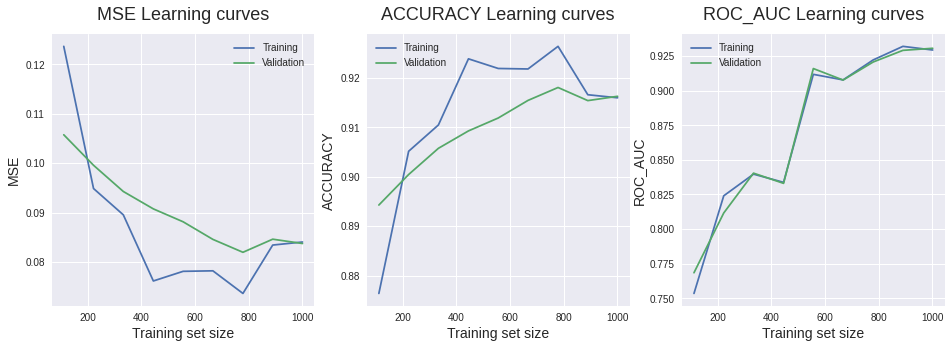

mACC:0.916
mAUC:0.919
<----------------------------------->



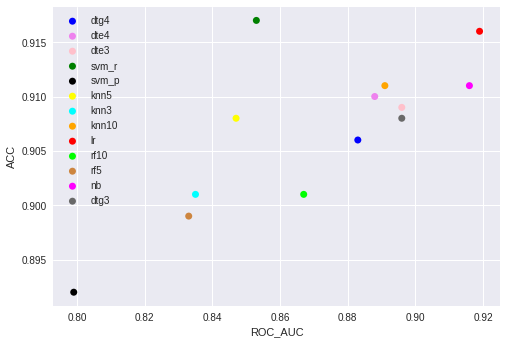

In [149]:
performance_comparer(X_kpca_r,y)

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
lda = LinearDiscriminantAnalysis()
X_lda_r = lda.fit_transform(X_t, y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTree Gini depth=4


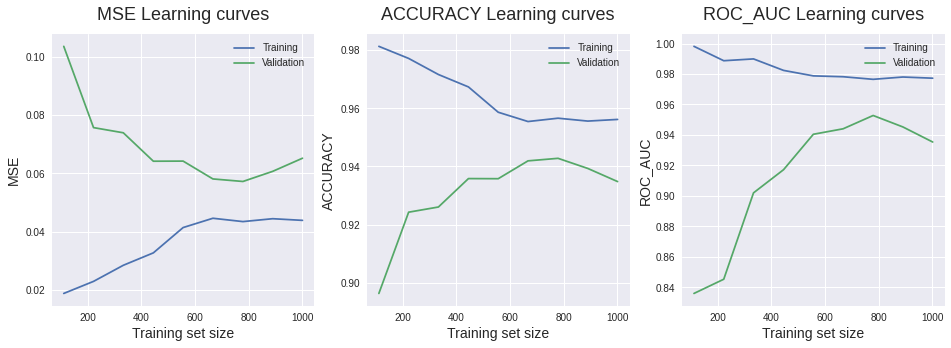

mACC:0.941
mAUC:0.947
<----------------------------------->

DecisionTree Entropy depth=4


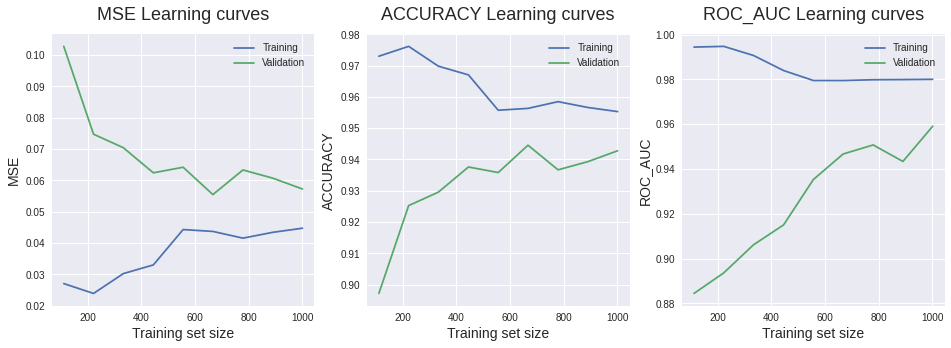

mACC:0.94
mAUC:0.947
<----------------------------------->

DecisionTree Gini depth=3


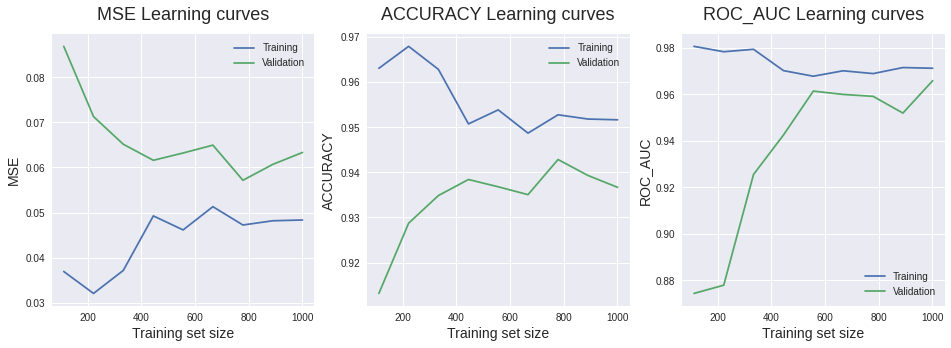

mACC:0.941
mAUC:0.947
<----------------------------------->

DecisionTree Entropy depth=3


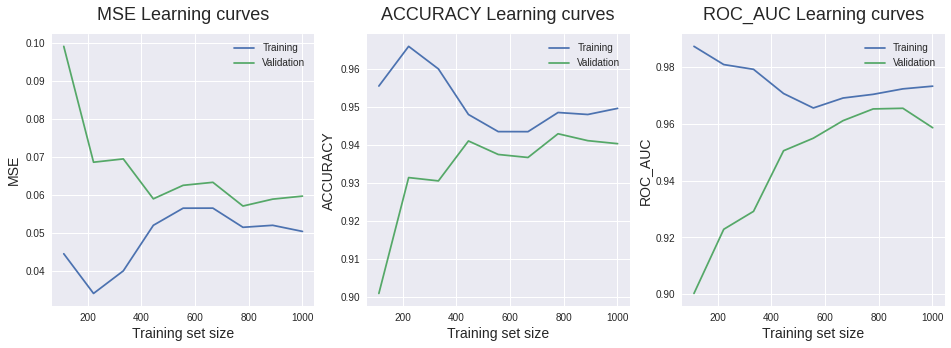

mACC:0.94
mAUC:0.947
<----------------------------------->

SVM kernel=poly


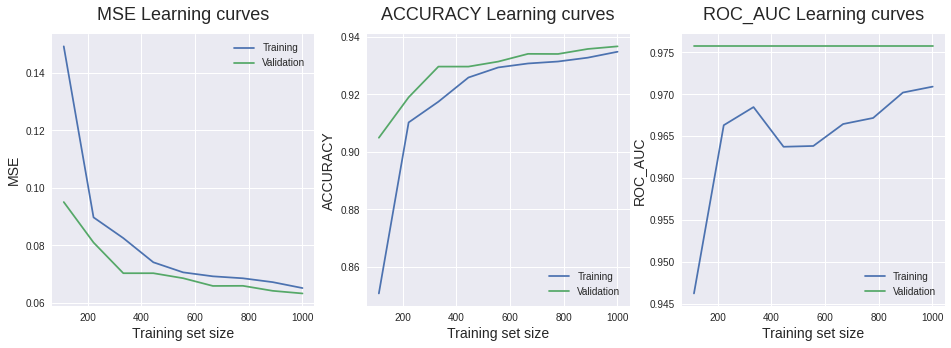

mACC:0.935
mAUC:0.976
<----------------------------------->

SVM kernel=rbf


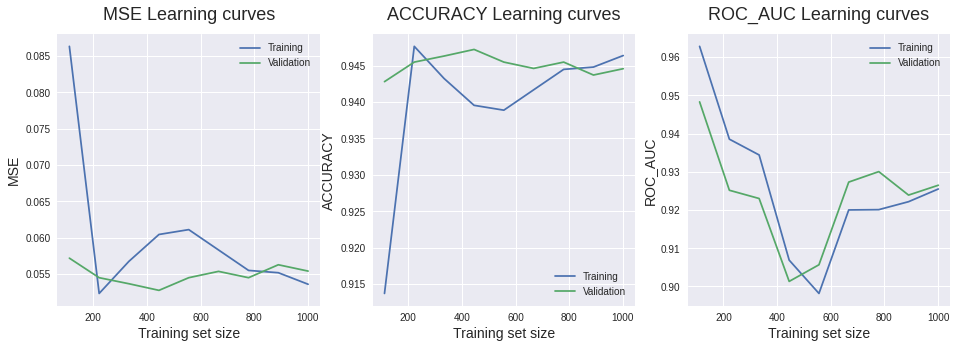

mACC:0.945
mAUC:0.927
<----------------------------------->

Random Forest estimators=10


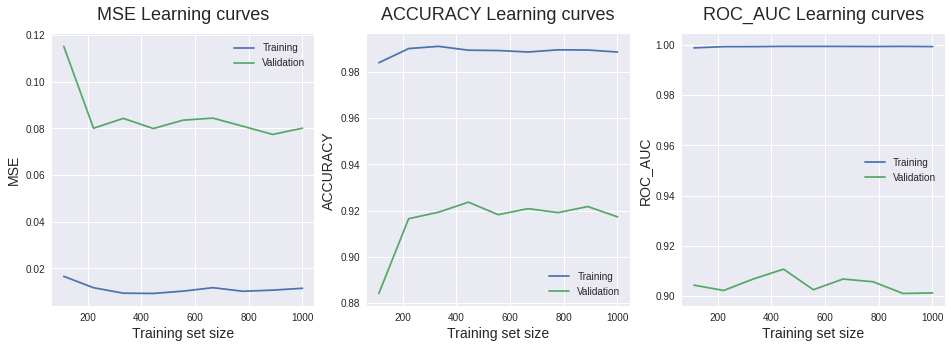

mACC:0.921
mAUC:0.904
<----------------------------------->

Random Forest estimators=5


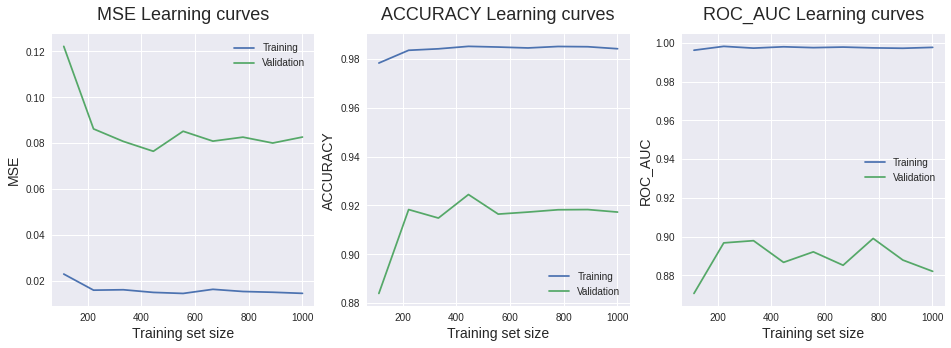

mACC:0.918
mAUC:0.891
<----------------------------------->

Naive Bayes


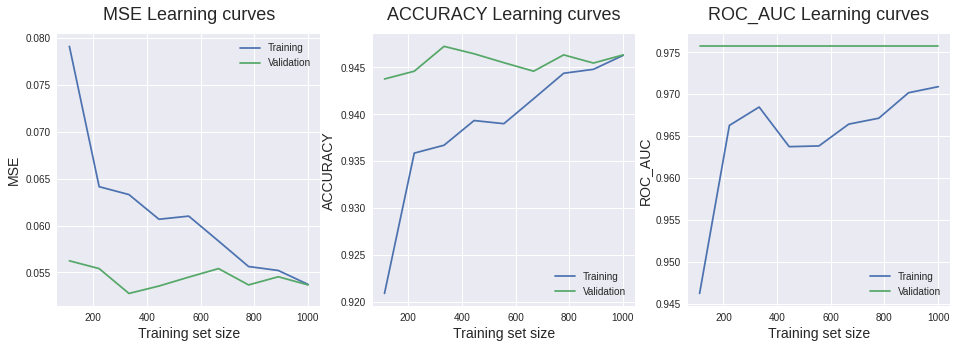

mACC:0.945
mAUC:0.976
<----------------------------------->

3NN


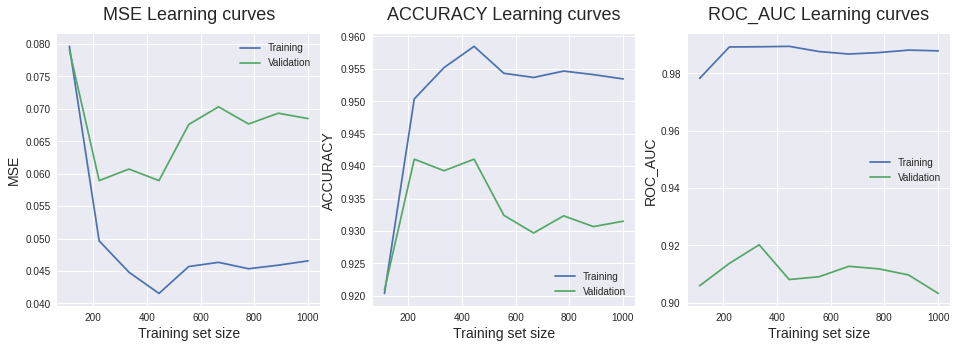

mACC:0.931
mAUC:0.911
<----------------------------------->

5NN


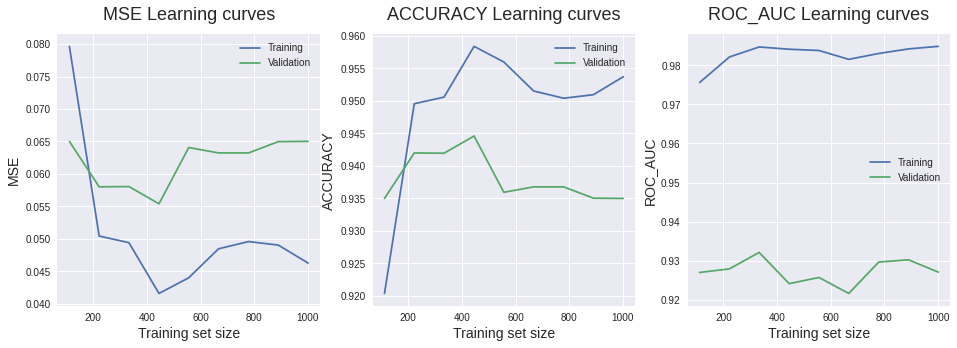

mACC:0.936
mAUC:0.927
<----------------------------------->

10NN


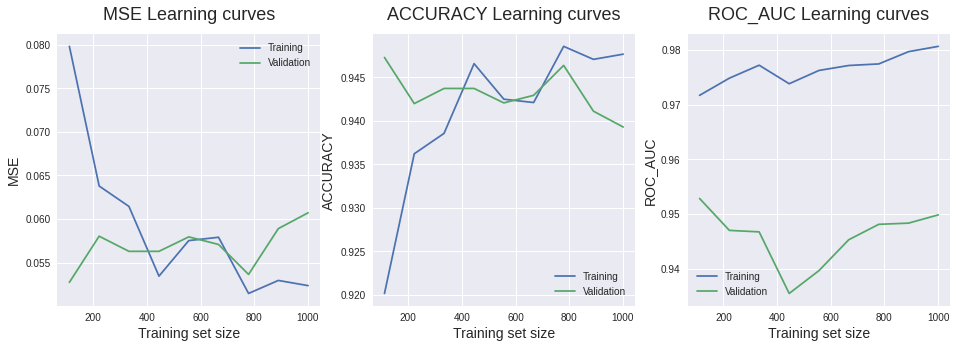

mACC:0.943
mAUC:0.947
<----------------------------------->

LogisticRegression


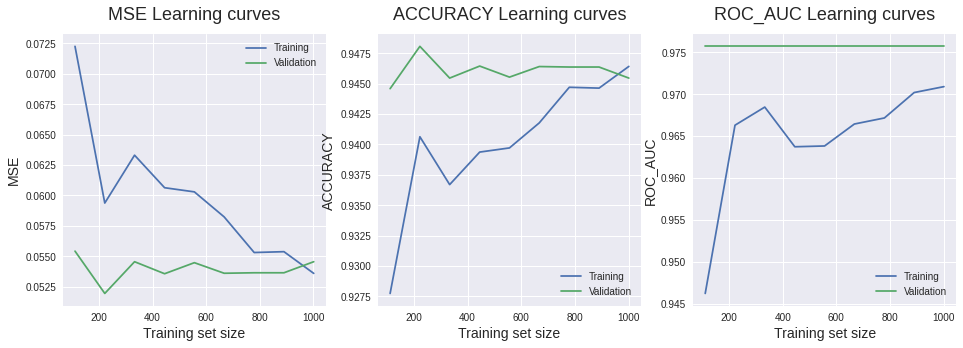

mACC:0.946
mAUC:0.976
<----------------------------------->



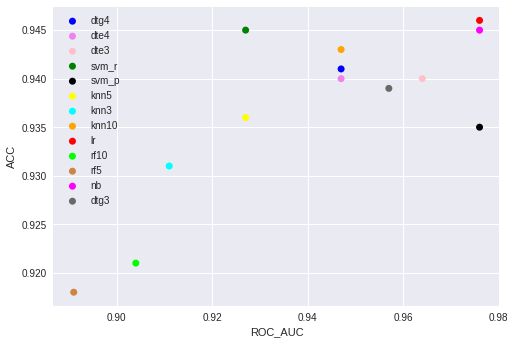

In [50]:
performance_comparer(X_lda_r, y)

In [68]:
pca = PCA()
# perform PCA on the scaled data
pca.fit(X_t)

PCA()

In [69]:

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[5.39818647e+01 1.80032844e+01 9.05140340e+00 6.46011845e+00
 3.59696352e+00 3.36911379e+00 2.15797797e+00 1.30392028e+00
 7.63609734e-01 4.88948793e-01 4.48908323e-01 2.90882389e-01
 8.30042290e-02 1.03961636e-31]



In [70]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 53.98186471  71.98514913  81.03655253  87.49667097  91.09363449
  94.46274828  96.62072625  97.92464653  98.68825627  99.17720506
  99.62611338  99.91699577 100.         100.        ]



Text(0, 0.5, 'Explained variance (%)')

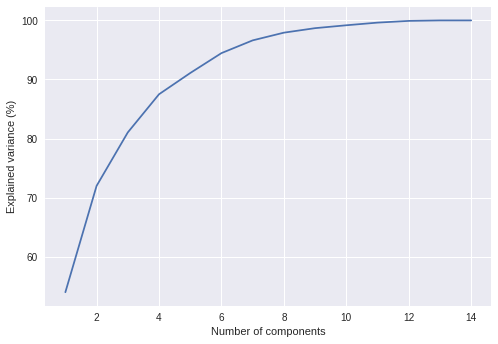

In [73]:
# plot a scree plot
components = None
components = len(pca.explained_variance_ratio_) if components is None else components
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[53.98186471 71.98514913 81.03655253 87.49667097 91.09363449]
Number of components: 5


Text(0, 0.5, 'Explained variance (%)')

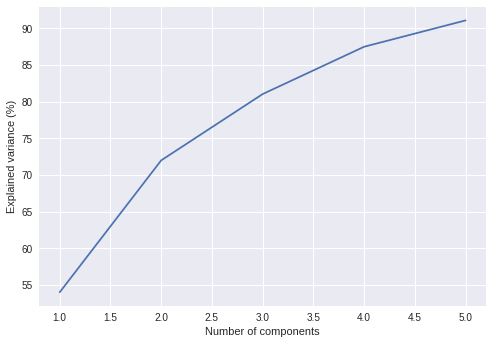

In [74]:
pca = PCA(n_components = 0.9)
pca.fit(X_t)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [75]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.26654219 0.32315628 0.23251802 0.19534806 0.33379691 0.20124348
  0.33938654 0.03214328 0.23251802 0.34125519 0.31634751 0.24791256
  0.33750283 0.13490656]
 [0.16963674 0.06107045 0.4464473  0.17887202 0.04680248 0.30309143
  0.14048492 0.28983253 0.4464473  0.09680162 0.16627346 0.34431423
  0.1677342  0.39416993]
 [0.27790498 0.04315595 0.13357916 0.53512122 0.09197542 0.41998625
  0.08905899 0.29066467 0.13357916 0.13755618 0.26980416 0.31515597
  0.05616633 0.35693916]
 [0.20814097 0.28865085 0.13087577 0.17047891 0.07704591 0.08100565
  0.04589112 0.85087547 0.13087577 0.03028801 0.18072583 0.03269852
  0.11158797 0.15602796]
 [0.38469406 0.13786363 0.2131268  0.62237222 0.03452611 0.18448296
  0.0624393  0.06806013 0.2131268  0.11835638 0.11180977 0.24149432
  0.0248598  0.47498086]]


In [76]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['RBI_bt', 'R_bt', 'H_bt', '2B_bt']
Component 1: ['SLG_bt', 'SLG_bt', 'SB_bt', 'HR_bt']
Component 2: ['OBP_bt', '3B_bt', 'SB_bt', 'HR_bt']
Component 3: ['Rfield_bt', 'WAR_bt', 'total_seasons', 'G_bt']
Component 4: ['OBP_bt', 'SB_bt', 'total_seasons', 'HR_bt']


In [100]:
X_pca = pca.transform(X_t)
print(X_pca.shape)
print(X_pca)

(1136, 5)
[[-2.46179994e+00 -2.56107576e-01 -1.05723888e+00  1.68670412e+00
   8.19188714e-01]
 [ 1.16250022e+01 -8.98474102e-01 -2.56244812e+00 -1.29060630e+00
  -8.36286575e-01]
 [-2.25946674e+00  2.83450635e-01  2.60552131e-01  2.66424980e-01
   4.34752469e-01]
 ...
 [-1.23681040e-01 -2.02085427e+00 -2.15418026e-01  6.66126613e-04
  -9.43011882e-02]
 [ 1.53240541e+00 -1.05485269e+00 -1.12355078e+00  2.11847919e+00
   3.21208747e-01]
 [-9.13583014e-01  1.82393474e+00 -6.56370289e-01 -1.49696876e+00
   5.82095338e-01]]


DecisionTree Gini depth=4


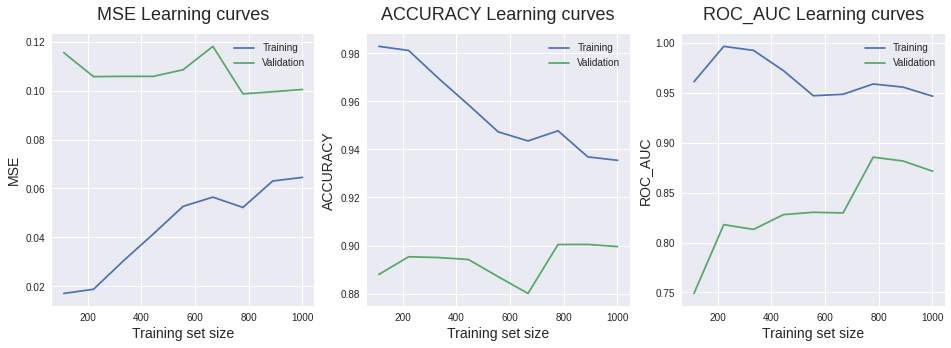

mACC:0.894
mAUC:0.866
<----------------------------------->

DecisionTree Entropy depth=4


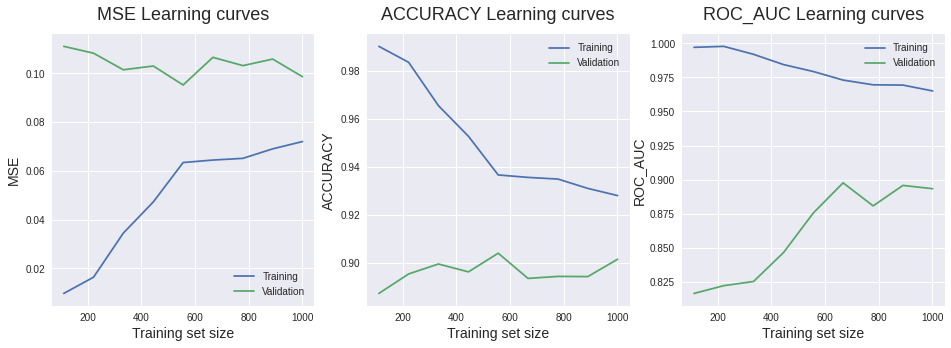

mACC:0.894
mAUC:0.891
<----------------------------------->

DecisionTree Gini depth=3


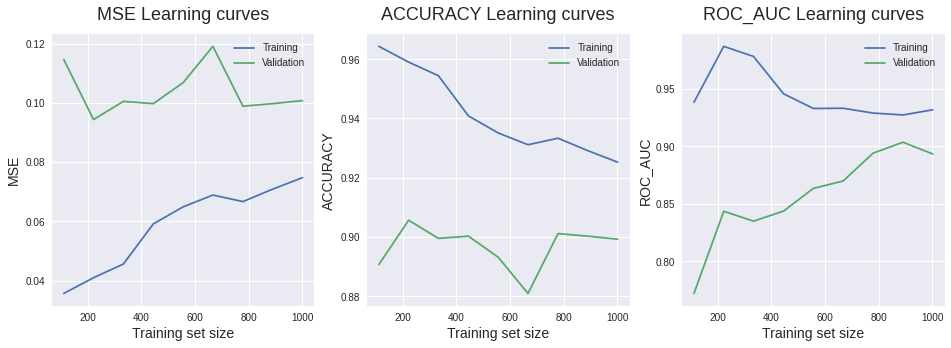

mACC:0.894
mAUC:0.866
<----------------------------------->

DecisionTree Entropy depth=3


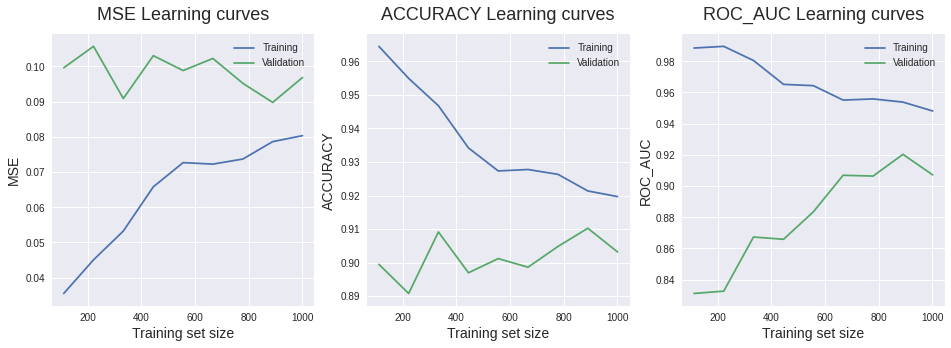

mACC:0.894
mAUC:0.891
<----------------------------------->

SVM kernel=poly


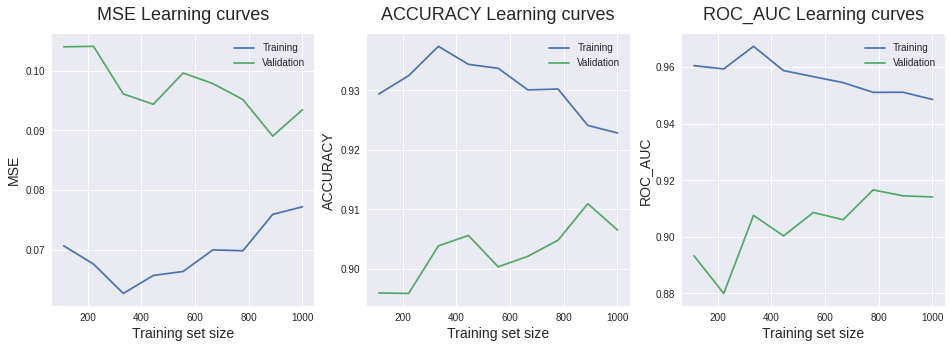

mACC:0.906
mAUC:0.912
<----------------------------------->

SVM kernel=rbf


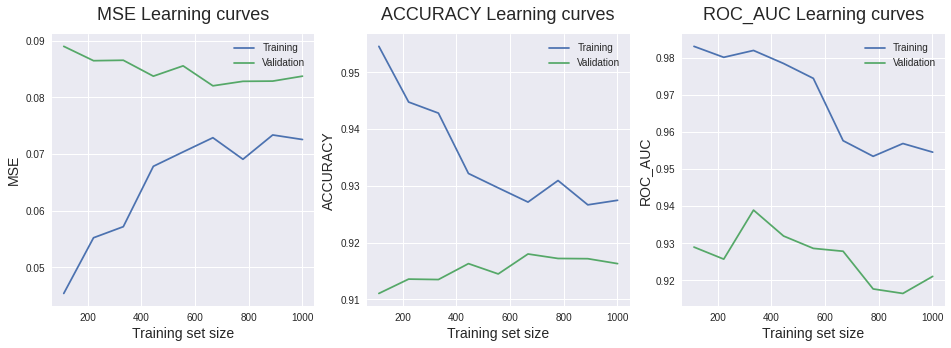

mACC:0.917
mAUC:0.921
<----------------------------------->

Random Forest estimators=10


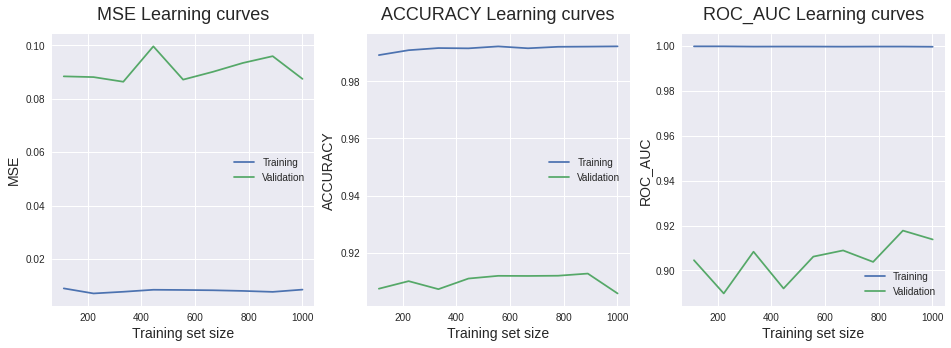

mACC:0.912
mAUC:0.91
<----------------------------------->

Random Forest estimators=5


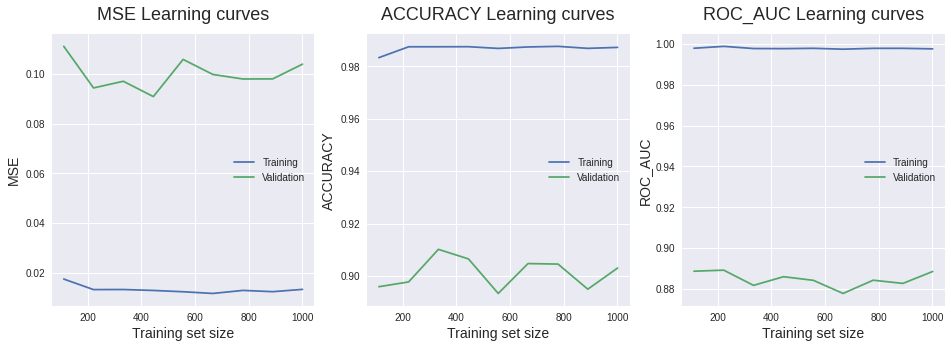

mACC:0.901
mAUC:0.882
<----------------------------------->

Naive Bayes


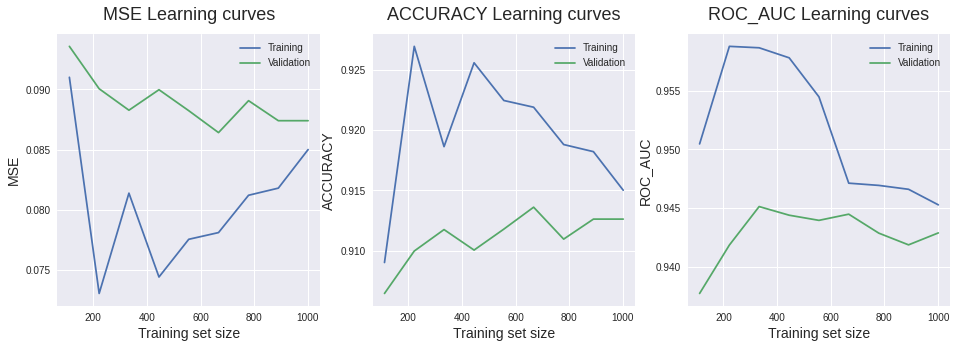

mACC:0.912
mAUC:0.943
<----------------------------------->

3NN


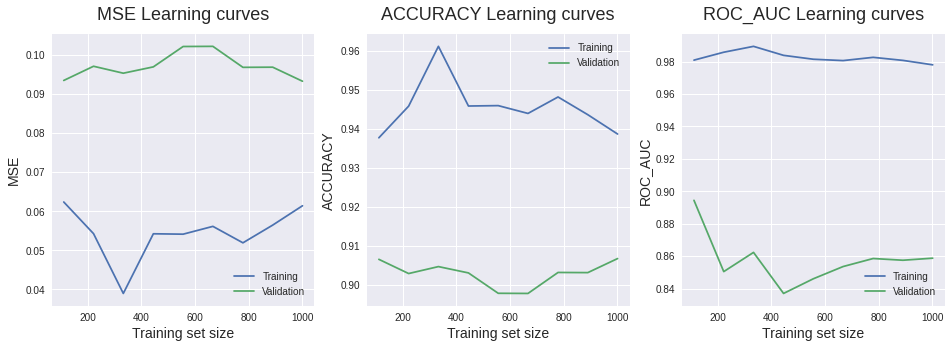

mACC:0.901
mAUC:0.857
<----------------------------------->

5NN


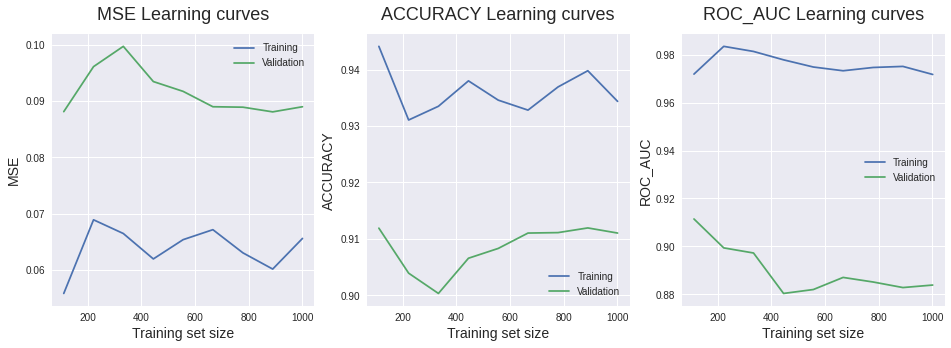

mACC:0.911
mAUC:0.885
<----------------------------------->

10NN


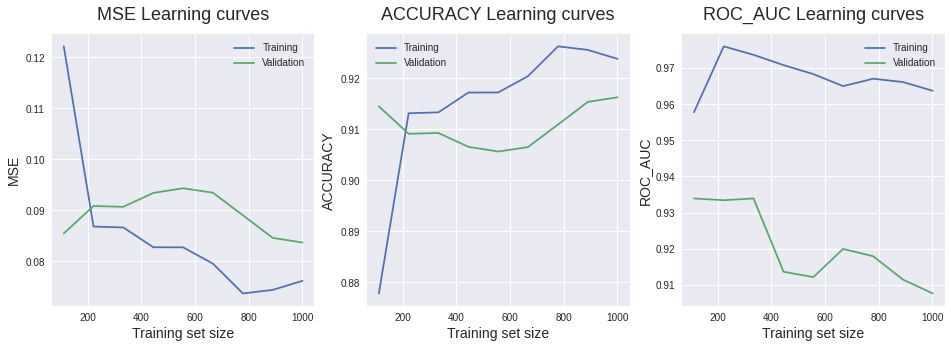

mACC:0.911
mAUC:0.916
<----------------------------------->

LogisticRegression


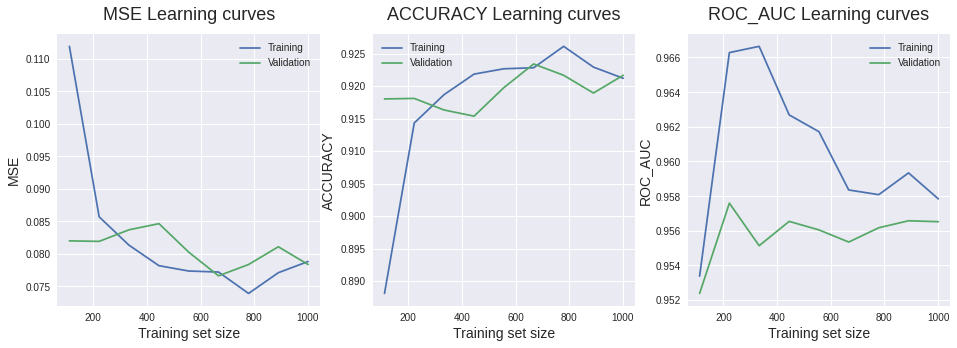

mACC:0.921
mAUC:0.956
<----------------------------------->



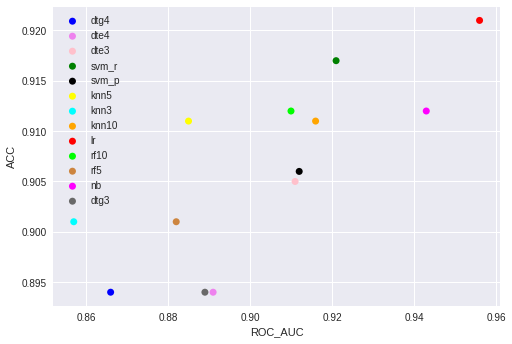

In [101]:
performance_comparer(X_pca,y)

In [99]:
from sklearn.pipeline import Pipeline
#from sklearn.linear_model import LogisticRegression

_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [79]:
from sklearn.model_selection import train_test_split

In [113]:
# perform a split
X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.3,shuffle=True, random_state=567)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('regressor', LogisticRegression())])

In [114]:
log_regress_model.score(X_test,y_test)

0.9296187683284457

In [103]:
mayor_league_condition = {
    'play_in_mayors':[1]
}
test_gt_condition = {
    'WAR_bt':10,
    "total_seasons":10,
    'retirament_decade':2010
}

test_df = filter_dataset(inactive_bat_df, mayor_league_condition, test_gt_condition, None, None)

In [105]:
test_df.shape

(216, 78)

In [111]:
X_unused_test = test_df[reduced_features]
y_unused_test = test_df["HoF"]

In [110]:
y_unused_test.value_counts()

0    209
1      7
Name: HoF, dtype: int64

In [115]:
log_regress_model.score(X_unused_test, y_unused_test)

0.9351851851851852

In [146]:
y_unused_test.iloc[0]

0

In [150]:
def compute_prediction_test(model,X_unused_test, y_unused_test):
    computes = []
    for i in range(len(X_unused_test)):
        p_pred = model.predict_proba(X_unused_test.iloc[i].to_numpy().reshape(1,-1))
        hof = y_unused_test.iloc[i]
        computes.append((test_df.iloc[i]['Name'],round(p_pred[0][1],3),hof))
    return computes
        #print(f"{test_df.iloc[i]['Name']} ---->  HOF_proba: {round(p_pred[0][1],3)} <----- real Hof status:{hof}")

In [151]:
results =  compute_prediction_test(log_regress_model, X_unused_test, y_unused_test)
results.sort(key= lambda x: x[1], reverse=True)

/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/abel/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X doe

In [152]:
results

[('Alex Rodriguez', 0.986, 0),
 ('Adrian Beltre', 0.971, 0),
 ('Todd Helton', 0.945, 0),
 ('Chipper Jones', 0.921, 1),
 ('Ken Griffey Jr.', 0.895, 1),
 ('Scott Rolen', 0.864, 0),
 ('Jim Thome', 0.856, 1),
 ('Manny Ramirez', 0.804, 0),
 ('Ivan Rodriguez', 0.795, 1),
 ('Carlos Beltran', 0.789, 0),
 ('Bobby Abreu', 0.761, 0),
 ('Andruw Jones', 0.755, 0),
 ('David Ortiz', 0.751, 1),
 ('Vladimir Guerrero', 0.738, 1),
 ('Ichiro Suzuki', 0.68, 0),
 ('Chase Utley', 0.613, 0),
 ('Jim Edmonds', 0.6, 0),
 ('Lance Berkman', 0.579, 0),
 ('Johnny Damon', 0.545, 0),
 ('Omar Vizquel', 0.45, 0),
 ('Mark Teixeira', 0.421, 0),
 ('Jason Giambi', 0.373, 0),
 ('Joe Mauer', 0.347, 0),
 ('J.D. Drew', 0.323, 0),
 ('Adrian Gonzalez', 0.287, 0),
 ('Matt Holliday', 0.286, 0),
 ('Derek Jeter', 0.282, 1),
 ('Torii Hunter', 0.275, 0),
 ('Jimmy Rollins', 0.266, 0),
 ('Dustin Pedroia', 0.249, 0),
 ('Ian Kinsler', 0.236, 0),
 ('Ryan Braun', 0.22, 0),
 ('Curtis Granderson', 0.206, 0),
 ('Derrek Lee', 0.183, 0),
 ('Troy 